# Dette Program bruge til at lave samme model som før nu med markedsværdier

## Det første step er til at hente data ind. Dette step er præcis det samme som i Program til seminar

In [627]:
# nedenstående kode er til at hente data og finde ud af hvor mange observationer der er pr. firma i dataen
# datasættet består af 25 observationer pr. firma der er 158 firmaer i alt

import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Load the Excel file
# hent data fra excel filen 'financielle_data_renset.xlsx'
data = pd.read_excel('financielle_data_renset.xlsx')

# sorter data efter firma kode og år med den ældste år først
data = data.sort_values(by=['firma kode', 'year'])

# i data filen 'data' laves en variable kaldt *growth* som er den procentvise vækst i 'Total Revenue' fra år til år 
data['Growth']= data['Total Revenue'].pct_change() * 100

# Group by 'firma kode' and calculate 3-year rolling average
data['risk average'] = data.groupby('firma kode')['EBITDA/Tot Assets, %'].transform(lambda x: x.rolling(window=3, min_periods=1).mean())

# Calculate deviation from the rolling average
data['risk'] = data['EBITDA/Tot Assets, %'] - data['risk average']

data.head()  # Display the first few rows of the DataFrame


### det her nede er en test af data
# Step 2: Count the number of observations per "firma kode"
#obs_per_firm = data['firma kode'].value_counts()

# Step 3: Print or save the result
#print(obs_per_firm)

# make a variable if the number of observations is not 25 
#obs_per_firm_wrong = obs_per_firm[obs_per_firm != 25]

#print(obs_per_firm_wrong)


,firma kode,dato,day,month,year,"ROA Total Assets, Percent",ROE Total Equity %,"EBITDA/Tot Assets, %",Tot Assets/Comm Eqty,"Total Debt to Total Equity, Percent","Long Term Debt to Total Capital, Percent",Net Debt To EBITDA (Daily Time Series Ratio),"Effective Tax Rate, (%)",Quick Ratio,"EBITDA Margin, Percent",Total Revenue,"Total Cash Dividends Paid, Cumulative",Growth,risk average,risk
24,5PG.OL,2000-12-31 00:00:00,31,12,2000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,NaN,0.0,0.0
23,5PG.OL,2001-12-31 00:00:00,31,12,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,NaN,0.0,0.0
22,5PG.OL,2002-12-31 00:00:00,31,12,2002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,NaN,0.0,0.0
21,5PG.OL,2003-12-31 00:00:00,31,12,2003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,NaN,0.0,0.0
20,5PG.OL,2004-12-31 00:00:00,31,12,2004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,NaN,0.0,0.0


In [628]:
## merge with the dataset 'branche data.xlsx'

# load data 'branche data.xlsx'
branche_data = pd.read_excel('branche data.xlsx')

# merge the two datasets in a left join on the column 'firma kode' = 'firma kode' 
# with 'data' as a left join 'branche_data' as b on 'firma kode' = 'firma kode'
# from b take only variable 'Company Common Name' and 'NAICS Sector Name'               !!!!! hvis koden ikke virker så prøv at ændre 'firma kode' til 'Firma kode' i data og branche_data
data_merge = pd.merge(data, branche_data[['Firma kode', 'Company Common Name', 'NAICS Sector Name']], left_on='firma kode', right_on='Firma kode', how='left')
data_merge.head()  # Display the first few rows of the DataFrame


,firma kode,dato,day,month,year,"ROA Total Assets, Percent",ROE Total Equity %,"EBITDA/Tot Assets, %",Tot Assets/Comm Eqty,"Total Debt to Total Equity, Percent",...,Quick Ratio,"EBITDA Margin, Percent",Total Revenue,"Total Cash Dividends Paid, Cumulative",Growth,risk average,risk,Firma kode,Company Common Name,NAICS Sector Name
0,5PG.OL,2000-12-31 00:00:00,31,12,2000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,NaN,0.0,0.0,5PG.OL,5Th Planet Games A/S,Information
1,5PG.OL,2001-12-31 00:00:00,31,12,2001,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,NaN,0.0,0.0,5PG.OL,5Th Planet Games A/S,Information
2,5PG.OL,2002-12-31 00:00:00,31,12,2002,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,NaN,0.0,0.0,5PG.OL,5Th Planet Games A/S,Information
3,5PG.OL,2003-12-31 00:00:00,31,12,2003,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,NaN,0.0,0.0,5PG.OL,5Th Planet Games A/S,Information
4,5PG.OL,2004-12-31 00:00:00,31,12,2004,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,NaN,0.0,0.0,5PG.OL,5Th Planet Games A/S,Information


### Her skal der nu merges med Tobin's Q datasættet

In [629]:
## merge with the dataset 'branche data.xlsx'

# load data ' *** tobins q *** data.xlsx'
tobin_data = pd.read_excel('tobins Q.xlsx')

# sorter data efter firma kode og år med den ældste år først
tobin_data = tobin_data.sort_values(by=['firma kode', 'year'])

#tobin_data.head(5)

# merge the two datasets in a left join on the column 'firma kode' = 'firma kode' and 'year' = 'year'
# with 'data' as a left join 'tobin_data' as b on 'firma kode' = 'firma kode' and 'year' = 'year'
# from b take only variables 'Market Value for Company', 'Total Assets, Reported'  and 'Total Debt'  !!!!! hvis koden ikke virker så prøv at ændre 'firma kode' til 'Firma kode' i data og branche_data
data_merge_2 = pd.merge(data_merge, tobin_data[['firma kode', 'year', 'Market Value for Company', 'Total Assets, Reported', 
                                                'Total Debt','EBIT', 'EBITDA']], left_on=['firma kode', 'year'], 
                                                right_on=['firma kode', 'year'], how='left')

# gnerer Tobins Q = ('Market Value for Company' + 'Total Debt') / 'Total Assets, Reported'
#data_merge_2['Tobins Q'] = (data_merge_2['Market Value for Company']) / data_merge_2['Total Assets, Reported']

data_merge_2.head()  # Display the first few rows of the DataFrame


,firma kode,dato,day,month,year,"ROA Total Assets, Percent",ROE Total Equity %,"EBITDA/Tot Assets, %",Tot Assets/Comm Eqty,"Total Debt to Total Equity, Percent",...,risk average,risk,Firma kode,Company Common Name,NAICS Sector Name,Market Value for Company,"Total Assets, Reported",Total Debt,EBIT,EBITDA
0,5PG.OL,2000-12-31 00:00:00,31,12,2000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5PG.OL,5Th Planet Games A/S,Information,NaN,NaN,NaN,NaN,NaN
1,5PG.OL,2001-12-31 00:00:00,31,12,2001,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5PG.OL,5Th Planet Games A/S,Information,NaN,NaN,NaN,NaN,NaN
2,5PG.OL,2002-12-31 00:00:00,31,12,2002,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5PG.OL,5Th Planet Games A/S,Information,NaN,NaN,NaN,NaN,NaN
3,5PG.OL,2003-12-31 00:00:00,31,12,2003,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5PG.OL,5Th Planet Games A/S,Information,NaN,NaN,NaN,NaN,NaN
4,5PG.OL,2004-12-31 00:00:00,31,12,2004,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5PG.OL,5Th Planet Games A/S,Information,NaN,NaN,NaN,NaN,NaN


## Nu filterer vi på samme måde som før for null rækker og for finansielle virksomheder 

In [630]:
# data test 
# make a copi of data called data_test
data_test = data_merge_2.copy()

# define all columns
cols_to_check = [
    #"Total Debt to Total Equity, Percent",
    "Effective Tax Rate, (%)",
    "Quick Ratio",
    "EBITDA Margin, Percent",
    "Total Revenue",
    "Total Cash Dividends Paid, Cumulative"
    #"Market Value for Company", # tjek om det er det rigtige navn
    #"Total Debt", # tjek om det er det rigtige navn
    #"Total Assets, Reported" # tjek om det er det rigtige navn
]


# make the data_test sort out all obs if if alle variablerne er 0
data_test_1 = data_test[
    (data_test[cols_to_check] != 0).any(axis=1)  # Keep rows where at least one column is not zero
]


# Keep only rows where *all* three columns are present (not NaN)
cols = ["Market Value for Company", "Total Assets, Reported", "Total Debt", "EBIT", "EBITDA"]

data_test_2 = data_test_1.dropna(subset=cols)

# ‑‑ or, if you prefer an explicit boolean mask ‑‑
mask = data_test_1[cols].notna().all(axis=1)
data_test_2 = data_test_1[mask]

# drop rows if 'NAICS Sector Name' is == "Finance and Insurance"
data_test_3 = data_test_2[data_test_1['NAICS Sector Name'] != "Finance and Insurance"]

# drop rows if debt = 0
data_test_3 = data_test_3[data_test_3['Total Debt'] != 0]

# make a variable called 'debt to assets ratio' by dividing 'Total Debt to Total Equity, Percent' with 'Tot Assets/Comm Eqty'
data_test_3['debt to assets ratio'] = data_test_3['Total Debt to Total Equity, Percent'] / data_test_3['Tot Assets/Comm Eqty']
data_test_3['debt to assets ratio 2'] = (data_test_3['Total Debt'] / (data_test_3['Market Value for Company'] + data_test_3['Total Debt'] )) * 100


data_test_3.head()  # Display the first few rows of the DataFrame

C:\Users\marcu\AppData\Local\Temp\ipykernel_11124\305792881.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_test_3 = data_test_2[data_test_1['NAICS Sector Name'] != "Finance and Insurance"]


,firma kode,dato,day,month,year,"ROA Total Assets, Percent",ROE Total Equity %,"EBITDA/Tot Assets, %",Tot Assets/Comm Eqty,"Total Debt to Total Equity, Percent",...,Firma kode,Company Common Name,NAICS Sector Name,Market Value for Company,"Total Assets, Reported",Total Debt,EBIT,EBITDA,debt to assets ratio,debt to assets ratio 2
15,5PG.OL,2015-12-31 00:00:00,31,12,2015,-51.460444,-66.189882,-29.072502,1.214869,13.237921,...,5PG.OL,5Th Planet Games A/S,Information,8.744197e+07,63240000.0,6891000.0,-28031000.0,-16627000.0,10.896584,7.304975
16,5PG.OL,2016-12-31 00:00:00,31,12,2016,-126.747697,-175.930070,-34.585335,1.989655,33.911767,...,5PG.OL,5Th Planet Games A/S,Information,5.776310e+07,29811000.0,5081000.0,-28489000.0,-16091000.0,17.044044,8.085086
17,5PG.OL,2017-12-31 00:00:00,31,12,2017,-46.978470,-66.142907,-37.680377,1.252418,5.617216,...,5PG.OL,5Th Planet Games A/S,Information,2.015621e+08,70188000.0,3148000.0,-26362000.0,-18840000.0,4.485097,1.537785
19,5PG.OL,2019-12-31 00:00:00,31,12,2019,-64.654729,-97.175108,-23.684731,1.902897,44.061962,...,5PG.OL,5Th Planet Games A/S,Information,1.500972e+07,13267000.0,3072000.0,-7809000.0,-5992000.0,23.155197,16.989533
20,5PG.OL,2020-12-31 00:00:00,31,12,2020,-29.527394,-43.078138,-25.935493,1.310738,10.871751,...,5PG.OL,5Th Planet Games A/S,Information,8.925154e+07,27380000.0,2271000.0,-5580000.0,-5271000.0,8.294375,2.481356


hvis data sorteringen virker køre nedstående kode

In [631]:
data_test= data_test_3.copy()

## her laver vi den markedsværdi baseret variable

Her er formlerne for alle de markeds baseret variable 

$$ 
ROA_{bogført} = \frac{\text{Nettoresultat (EBIT eller EBITDA)}}{\text{Bogført aktiver}},  (\text{her kan den normale ROA bruges})
$$
$$ 
ROA_{markedsværdi} = \frac{\text{Nettoresultat (EBIT eller EBITDA)}}{\text{Markedsværdi af aktiver}}
$$
 

Markedsværdier af aktiver er givet ved $\text{Markedsværdi af egenkapital (Market value of company) + Bogført gæld}$

markedsværdi af egenkapital er givet som $\text{aktiekurs x antallet af aktier}$

$$ 
ROE_{bogført} = \frac{\text{Nettoresultat (EBIT eller EBITDA)}}{\text{Bogført egenkapital}},  (\text{her kan den normale ROE bruges})
$$
$$ 
ROE_{markedsværdi} = \frac{\text{Nettoresultat (EBIT eller EBITDA)}}{\text{Markedsværdi af egenkapital (Market value of company)}}
$$

Her er markedsværdi for gæld

$$
\text{gæld til samlet aktiver}_{bogført} = \frac{gæld (Total Debt)}{\text{samlet aktiver (Total assets)}} 
$$

$$
\text{gæld til samlet aktiver}_{markedsværdi} = \frac{gæld (Total Debt)}{\text{markedsværdi af aktiver (se ovenfor)}} 
$$

In [632]:
# here we make ROA_market_value = EBIT / (Market Value for Company + Total Debt)
data_test['ROA_market_value'] = (data_test['EBITDA'] / (data_test['Market Value for Company'] + data_test['Total Debt']))*100

# here we make ROE_market_value = EBIT / Market Value for Company
data_test['ROE_market_value'] = (data_test['EBITDA'] / (data_test['Market Value for Company']))*100

# here we make debt_book_value = Total Debt / (Total Assets, Reported)
data_test['debt_book_value'] = (data_test['Total Debt'] / (data_test['Total Assets, Reported']))*100

# here we make debt_market_value = Total Debt / (Market Value for Company + Total Debt)
data_test['debt_market_value'] = (data_test['Total Debt'] / (data_test['Market Value for Company'] + data_test['Total Debt']))*100

data_test.head()  # Display the first few rows of the DataFrame

,firma kode,dato,day,month,year,"ROA Total Assets, Percent",ROE Total Equity %,"EBITDA/Tot Assets, %",Tot Assets/Comm Eqty,"Total Debt to Total Equity, Percent",...,"Total Assets, Reported",Total Debt,EBIT,EBITDA,debt to assets ratio,debt to assets ratio 2,ROA_market_value,ROE_market_value,debt_book_value,debt_market_value
15,5PG.OL,2015-12-31 00:00:00,31,12,2015,-51.460444,-66.189882,-29.072502,1.214869,13.237921,...,63240000.0,6891000.0,-28031000.0,-16627000.0,10.896584,7.304975,-17.625862,-19.014896,10.896584,7.304975
16,5PG.OL,2016-12-31 00:00:00,31,12,2016,-126.747697,-175.930070,-34.585335,1.989655,33.911767,...,29811000.0,5081000.0,-28489000.0,-16091000.0,17.044044,8.085086,-25.604629,-27.856882,17.044044,8.085086
17,5PG.OL,2017-12-31 00:00:00,31,12,2017,-46.978470,-66.142907,-37.680377,1.252418,5.617216,...,70188000.0,3148000.0,-26362000.0,-18840000.0,4.485097,1.537785,-9.203260,-9.346996,4.485097,1.537785
19,5PG.OL,2019-12-31 00:00:00,31,12,2019,-64.654729,-97.175108,-23.684731,1.902897,44.061962,...,13267000.0,3072000.0,-7809000.0,-5992000.0,23.155197,16.989533,-33.138438,-39.920795,23.155197,16.989533
20,5PG.OL,2020-12-31 00:00:00,31,12,2020,-29.527394,-43.078138,-25.935493,1.310738,10.871751,...,27380000.0,2271000.0,-5580000.0,-5271000.0,8.294375,2.481356,-5.759237,-5.905780,8.294375,2.481356


## Her filter vi igen på 1pct.

In [743]:
# List of variables to trim ROE and ROA and debt 
trim_vars = ['ROA_market_value', 'ROE_market_value', 'debt_market_value', 'debt_book_value'] #'ROA Total Assets, Percent', 'ROE Total Equity %'

# Create a copy to work with
data_trimmed = data_test.copy()

for var in trim_vars:
    lower = data_trimmed[var].quantile(0.025)
    upper = data_trimmed[var].quantile(0.975)
    data_trimmed = data_trimmed[(data_trimmed[var] >= lower) & (data_trimmed[var] <= upper)]

#data_trimmed = data_trimmed[(data_trimmed['ROE_market_value'] <= 38) & data_trimmed['debt_market_value'] <= 62]

print(f"Rows kept: {len(data_trimmed)} out of {len(data_test)}")
data_trimmed.head()

Rows kept: 1445 out of 1781


,firma kode,dato,day,month,year,"ROA Total Assets, Percent",ROE Total Equity %,"EBITDA/Tot Assets, %",Tot Assets/Comm Eqty,"Total Debt to Total Equity, Percent",...,"Total Assets, Reported",Total Debt,EBIT,EBITDA,debt to assets ratio,debt to assets ratio 2,ROA_market_value,ROE_market_value,debt_book_value,debt_market_value
15,5PG.OL,2015-12-31 00:00:00,31,12,2015,-51.460444,-66.189882,-29.072502,1.214869,13.237921,...,63240000.0,6891000.0,-28031000.0,-16627000.0,10.896584,7.304975,-17.625862,-19.014896,10.896584,7.304975
17,5PG.OL,2017-12-31 00:00:00,31,12,2017,-46.978470,-66.142907,-37.680377,1.252418,5.617216,...,70188000.0,3148000.0,-26362000.0,-18840000.0,4.485097,1.537785,-9.203260,-9.346996,4.485097,1.537785
20,5PG.OL,2020-12-31 00:00:00,31,12,2020,-29.527394,-43.078138,-25.935493,1.310738,10.871751,...,27380000.0,2271000.0,-5580000.0,-5271000.0,8.294375,2.481356,-5.759237,-5.905780,8.294375,2.481356
25,AAB.CO,2000-12-31 00:00:00,31,12,2000,-4.548081,-5.709372,9.335682,1.271559,3.479967,...,104320000.0,2855000.0,-7699000.0,10017000.0,2.736771,6.506966,22.830221,24.419169,2.736771,6.506966
26,AAB.CO,2001-12-31 00:00:00,31,12,2001,0.155797,0.220915,9.338337,1.564768,19.507962,...,128034000.0,15962000.0,-4078000.0,10849000.0,12.467001,28.479309,19.356724,27.064509,12.467001,28.479309


In [634]:
#import numpy as np
#from scipy.stats import zscore     # part of SciPy
#import pandas as pd

# 1. Columns to screen
#trim_vars = ['ROA_market_value', 'ROE_market_value',
#             'debt_market_value', 'debt_book_value']

# 2. Copy the original frame
#data_trimmed = data_test.copy()

# 3. Compute Z-scores (column-wise, ignoring NaNs)
#z = np.abs(zscore(data_trimmed[trim_vars], nan_policy='omit'))

# 4. Build a mask: keep rows whose Z-score ≤ 3 in *all* vars
#threshold = 3.5
#mask = (z <= threshold).all(axis=1)

# 5. Apply the mask
#data_trimmed = data_trimmed[mask]

# (Optional) inspect result
#print(f"Rows kept: {len(data_trimmed)} out of {len(data_test)}")
#data_trimmed.head()


#### Plotter data 

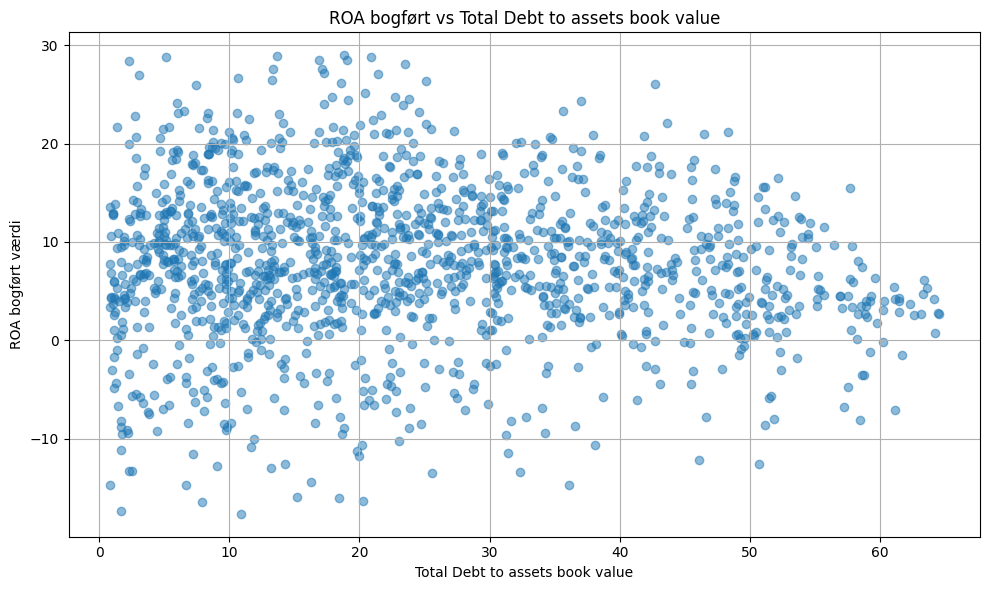

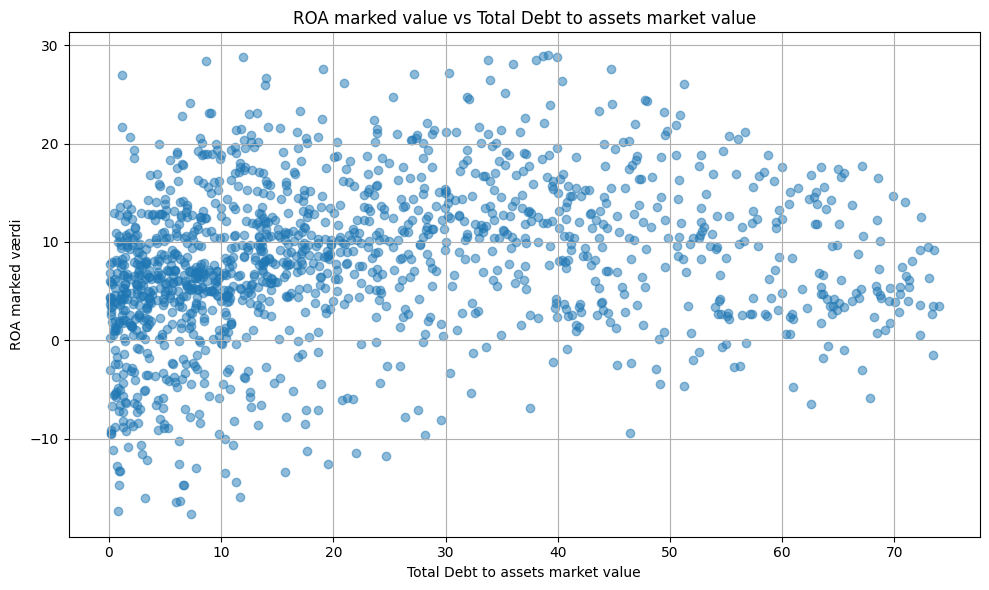

In [635]:
# Check the shape of the trimmed data

# first plot 'Tobins Q' against 'Total Debt to Total Equity, Percent'
plt.figure(figsize=(10, 6))
plt.scatter(data_trimmed['debt_book_value'], data_trimmed['ROA_market_value'], alpha=0.5)  
plt.title('ROA bogført vs Total Debt to assets book value')
plt.xlabel('Total Debt to assets book value')  
plt.ylabel('ROA bogført værdi')
plt.grid(True)
plt.tight_layout()
#plt.savefig('Tobins Q_vs_TDTE_filter.png', dpi=300)  # Save figure

plt.figure(figsize=(10, 6))
plt.scatter(data_trimmed['debt_market_value'], data_trimmed['ROA_market_value'], alpha=0.5)  
plt.title('ROA marked value vs Total Debt to assets market value')
plt.xlabel('Total Debt to assets market value')  
plt.ylabel('ROA marked værdi')
plt.grid(True)
plt.tight_layout()
#plt.savefig('Tobins Q_vs_TDTE_trimmed.png', dpi=300)  # Save figure

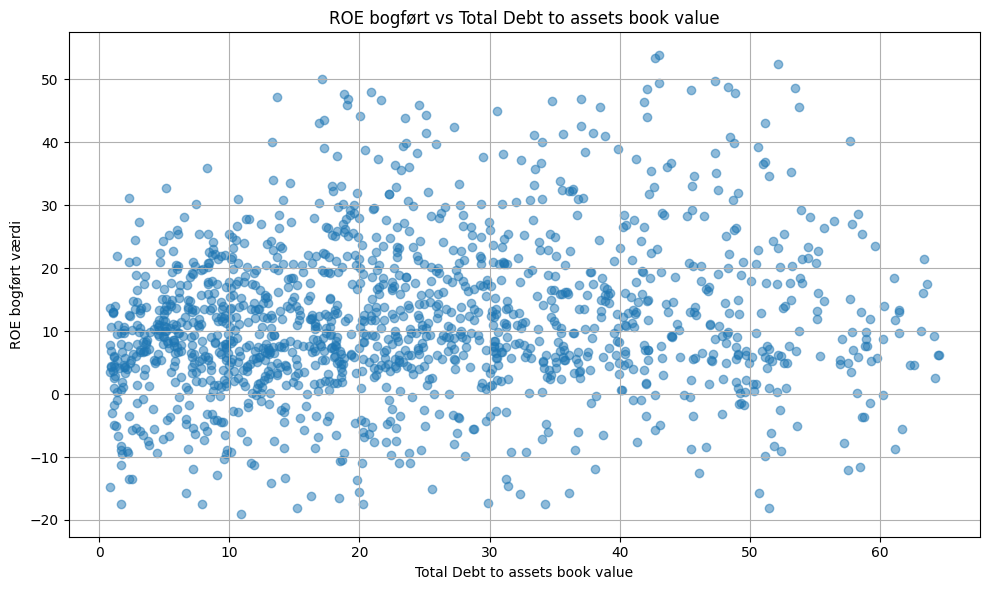

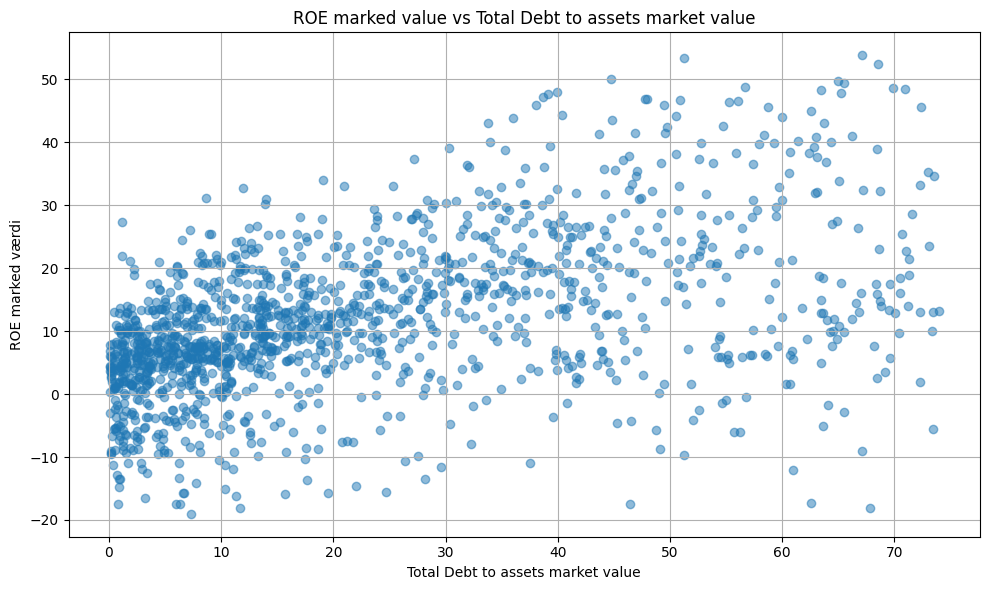

In [636]:
# Check the shape of the trimmed data
data_filter = data_test.copy()

# first plot 'Tobins Q' against 'Total Debt to Total Equity, Percent'
plt.figure(figsize=(10, 6))
plt.scatter(data_trimmed['debt_book_value'], data_trimmed['ROE_market_value'], alpha=0.5)  
plt.title('ROE bogført vs Total Debt to assets book value')
plt.xlabel('Total Debt to assets book value')  
plt.ylabel('ROE bogført værdi')
plt.grid(True)
plt.tight_layout()
#plt.savefig('Tobins Q_vs_TDTE_filter.png', dpi=300)  # Save figure

plt.figure(figsize=(10, 6))
plt.scatter(data_trimmed['debt_market_value'], data_trimmed['ROE_market_value'], alpha=0.5)  
plt.title('ROE marked value vs Total Debt to assets market value')
plt.xlabel('Total Debt to assets market value')  
plt.ylabel('ROE marked værdi')
plt.grid(True)
plt.tight_layout()
#plt.savefig('Tobins Q_vs_TDTE_trimmed.png', dpi=300)  # Save figure

## Her laver vi Pooled ols på ROE bogført og markedsværdi

#### Her der det først for ROE bogført med bogført gæld og markedsgæld

In [637]:
# make a linear regression model with Tobins Q Total Assets, Percent' as the dependent variable and 'Total Debt to Total Equity, Percent' as the independent variable
# use 'Effective Tax Rate, (%)',	'Quick Ratio',	'EBITDA Margin, Percent',	'Total Cash Dividends Paid, Cumulative' and 'growth' as control variables 
# first make a regression only fot the year 2023 
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.stats.diagnostic as ssd
import statsmodels.stats.proportion as ssp
import statsmodels.stats.multitest as smm
import statsmodels.stats.outliers_influence as smi

# filter the data for the year 2023
#data_2023 = data[data['year'] >= 2023]
# Define the dependent and independent variables

# regression with 'Long Term Debt to Total Capital, Percent' as the explanatory variable and 'ROA Total Assets, Percent' as the dependent variable
y = data_trimmed['ROE Total Equity %']  # dependent variable 'Tobins Q'
X = data_trimmed[['debt_book_value', 'risk', 'Effective Tax Rate, (%)', 'EBITDA Margin, Percent','Total Cash Dividends Paid, Cumulative', 'Growth']] # gælds variable  'Long Term Debt to Total Capital, Percent', 'debt to assets ratio', 'risk' and 'Total Debt to Total Equity, Percent' - fjernet control variabel 'Total Cash Dividends Paid, Cumulative',
# Add a constant to the independent variables
X = sm.add_constant(X)
# Drop rows with NaN or infinite values in X or y
X = X.replace([np.inf, -np.inf], np.nan).dropna()
y = y[X.index]  # Ensure y matches the filtered X
# Fit the linear regression model
model_LTD = sm.OLS(y, X).fit(cov_type='HC3')
# Print the summary of the regression model


# Print the summary of the regression model
print(model_LTD.summary())

                            OLS Regression Results                            
Dep. Variable:     ROE Total Equity %   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     4.826
Date:                Thu, 08 May 2025   Prob (F-statistic):           0.000222
Time:                        15:30:10   Log-Likelihood:                -7246.2
No. Observations:                1403   AIC:                         1.451e+04
Df Residuals:                    1396   BIC:                         1.454e+04
Df Model:                           6                                         
Covariance Type:                  HC3                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

c:\Users\marcu\anaconda3\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 6, but rank is 5
  warnings.warn('covariance of constraints does not have full '


In [638]:
# make a linear regression model with Tobins Q Total Assets, Percent' as the dependent variable and 'Total Debt to Total Equity, Percent' as the independent variable
# use 'Effective Tax Rate, (%)',	'Quick Ratio',	'EBITDA Margin, Percent',	'Total Cash Dividends Paid, Cumulative' and 'growth' as control variables 
# first make a regression only fot the year 2023 
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.stats.diagnostic as ssd
import statsmodels.stats.proportion as ssp
import statsmodels.stats.multitest as smm
import statsmodels.stats.outliers_influence as smi

# filter the data for the year 2023
#data_2023 = data[data['year'] >= 2023]
# Define the dependent and independent variables

# regression with 'Long Term Debt to Total Capital, Percent' as the explanatory variable and 'ROA Total Assets, Percent' as the dependent variable
y = data_trimmed['ROE Total Equity %']  # dependent variable 'Tobins Q'
X = data_trimmed[['debt_market_value', 'risk', 'Effective Tax Rate, (%)', 'EBITDA Margin, Percent','Total Cash Dividends Paid, Cumulative', 'Growth']] # gælds variable  'Long Term Debt to Total Capital, Percent', 'debt to assets ratio', 'risk' and 'Total Debt to Total Equity, Percent' - fjernet control variabel 'Total Cash Dividends Paid, Cumulative',
# Add a constant to the independent variables
X = sm.add_constant(X)
# Drop rows with NaN or infinite values in X or y
X = X.replace([np.inf, -np.inf], np.nan).dropna()
y = y[X.index]  # Ensure y matches the filtered X
# Fit the linear regression model
model_LTD = sm.OLS(y, X).fit(cov_type='HC3')
# Print the summary of the regression model


# Print the summary of the regression model
print(model_LTD.summary())

                            OLS Regression Results                            
Dep. Variable:     ROE Total Equity %   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     5.354
Date:                Thu, 08 May 2025   Prob (F-statistic):           7.00e-05
Time:                        15:30:10   Log-Likelihood:                -7246.1
No. Observations:                1403   AIC:                         1.451e+04
Df Residuals:                    1396   BIC:                         1.454e+04
Df Model:                           6                                         
Covariance Type:                  HC3                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

c:\Users\marcu\anaconda3\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 6, but rank is 5
  warnings.warn('covariance of constraints does not have full '


#### Her laver vi markedsværdi af ROE til gæld med hhv. bogført gæld og markedsbaseret gæld

In [639]:
# make a linear regression model with Tobins Q Total Assets, Percent' as the dependent variable and 'Total Debt to Total Equity, Percent' as the independent variable
# use 'Effective Tax Rate, (%)',	'Quick Ratio',	'EBITDA Margin, Percent',	'Total Cash Dividends Paid, Cumulative' and 'growth' as control variables 
# first make a regression only fot the year 2023 
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.stats.diagnostic as ssd
import statsmodels.stats.proportion as ssp
import statsmodels.stats.multitest as smm
import statsmodels.stats.outliers_influence as smi

# filter the data for the year 2023
#data_2023 = data[data['year'] >= 2023]
# Define the dependent and independent variables

# regression with 'Long Term Debt to Total Capital, Percent' as the explanatory variable and 'ROA Total Assets, Percent' as the dependent variable
y = data_trimmed['ROE_market_value']  # dependent variable 'Tobins Q'
X = data_trimmed[['debt_book_value', 'risk', 'Effective Tax Rate, (%)', 'EBITDA Margin, Percent','Total Cash Dividends Paid, Cumulative', 'Growth']] # gælds variable  'Long Term Debt to Total Capital, Percent', 'debt to assets ratio', 'risk' and 'Total Debt to Total Equity, Percent' - fjernet control variabel 'Total Cash Dividends Paid, Cumulative',
# Add a constant to the independent variables
X = sm.add_constant(X)
# Drop rows with NaN or infinite values in X or y
X = X.replace([np.inf, -np.inf], np.nan).dropna()
y = y[X.index]  # Ensure y matches the filtered X
# Fit the linear regression model
model_LTD = sm.OLS(y, X).fit(cov_type='HC3')
# Print the summary of the regression model


# Print the summary of the regression model
print(model_LTD.summary())

                            OLS Regression Results                            
Dep. Variable:       ROE_market_value   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     13.31
Date:                Thu, 08 May 2025   Prob (F-statistic):           1.08e-12
Time:                        15:30:10   Log-Likelihood:                -5430.6
No. Observations:                1403   AIC:                         1.088e+04
Df Residuals:                    1396   BIC:                         1.091e+04
Df Model:                           6                                         
Covariance Type:                  HC3                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

c:\Users\marcu\anaconda3\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 6, but rank is 5
  warnings.warn('covariance of constraints does not have full '


In [640]:
# make a linear regression model with Tobins Q Total Assets, Percent' as the dependent variable and 'Total Debt to Total Equity, Percent' as the independent variable
# use 'Effective Tax Rate, (%)',	'Quick Ratio',	'EBITDA Margin, Percent',	'Total Cash Dividends Paid, Cumulative' and 'growth' as control variables 
# first make a regression only fot the year 2023 
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.stats.diagnostic as ssd
import statsmodels.stats.proportion as ssp
import statsmodels.stats.multitest as smm
import statsmodels.stats.outliers_influence as smi

# filter the data for the year 2023
#data_2023 = data[data['year'] >= 2023]
# Define the dependent and independent variables

# regression with 'Long Term Debt to Total Capital, Percent' as the explanatory variable and 'ROA Total Assets, Percent' as the dependent variable
y = data_trimmed['ROE_market_value']  # dependent variable 'Tobins Q'
X = data_trimmed[['debt_market_value', 'risk', 'Effective Tax Rate, (%)', 'EBITDA Margin, Percent','Total Cash Dividends Paid, Cumulative', 'Growth']] # gælds variable  'Long Term Debt to Total Capital, Percent', 'debt to assets ratio', 'risk' and 'Total Debt to Total Equity, Percent' - fjernet control variabel 'Total Cash Dividends Paid, Cumulative',
# Add a constant to the independent variables
X = sm.add_constant(X)
# Drop rows with NaN or infinite values in X or y
X = X.replace([np.inf, -np.inf], np.nan).dropna()
y = y[X.index]  # Ensure y matches the filtered X
# Fit the linear regression model
model_LTD = sm.OLS(y, X).fit(cov_type='HC3')
# Print the summary of the regression model


# Print the summary of the regression model
print(model_LTD.summary())

                            OLS Regression Results                            
Dep. Variable:       ROE_market_value   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     78.21
Date:                Thu, 08 May 2025   Prob (F-statistic):           1.96e-72
Time:                        15:30:10   Log-Likelihood:                -5246.9
No. Observations:                1403   AIC:                         1.051e+04
Df Residuals:                    1396   BIC:                         1.054e+04
Df Model:                           6                                         
Covariance Type:                  HC3                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

c:\Users\marcu\anaconda3\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 6, but rank is 5
  warnings.warn('covariance of constraints does not have full '


## Nu laver vi Pooled ols på ROA

#### her først for den bogførte ROA med gæld i hhv. bogført og markedsværdi

In [641]:
# make a linear regression model with Tobins Q Total Assets, Percent' as the dependent variable and 'Total Debt to Total Equity, Percent' as the independent variable
# use 'Effective Tax Rate, (%)',	'Quick Ratio',	'EBITDA Margin, Percent',	'Total Cash Dividends Paid, Cumulative' and 'growth' as control variables 
# first make a regression only fot the year 2023 
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.stats.diagnostic as ssd
import statsmodels.stats.proportion as ssp
import statsmodels.stats.multitest as smm
import statsmodels.stats.outliers_influence as smi

# filter the data for the year 2023
#data_2023 = data[data['year'] >= 2023]
# Define the dependent and independent variables

# regression with 'Long Term Debt to Total Capital, Percent' as the explanatory variable and 'ROA Total Assets, Percent' as the dependent variable
y = data_trimmed['ROA Total Assets, Percent']  # dependent variable 'Tobins Q'
X = data_trimmed[['debt_book_value', 'risk', 'Effective Tax Rate, (%)', 'EBITDA Margin, Percent','Total Cash Dividends Paid, Cumulative', 'Growth']] # gælds variable  'Long Term Debt to Total Capital, Percent', 'debt to assets ratio', 'risk' and 'Total Debt to Total Equity, Percent' - fjernet control variabel 'Total Cash Dividends Paid, Cumulative',
# Add a constant to the independent variables
X = sm.add_constant(X)
# Drop rows with NaN or infinite values in X or y
X = X.replace([np.inf, -np.inf], np.nan).dropna()
y = y[X.index]  # Ensure y matches the filtered X
# Fit the linear regression model
model_LTD = sm.OLS(y, X).fit(cov_type='HC3')
# Print the summary of the regression model


# Print the summary of the regression model
print(model_LTD.summary())

                                OLS Regression Results                               
Dep. Variable:     ROA Total Assets, Percent   R-squared:                       0.202
Model:                                   OLS   Adj. R-squared:                  0.199
Method:                        Least Squares   F-statistic:                     8.665
Date:                       Thu, 08 May 2025   Prob (F-statistic):           4.23e-08
Time:                               15:30:10   Log-Likelihood:                -5722.3
No. Observations:                       1403   AIC:                         1.146e+04
Df Residuals:                           1396   BIC:                         1.150e+04
Df Model:                                  6                                         
Covariance Type:                         HC3                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------

c:\Users\marcu\anaconda3\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 6, but rank is 5
  warnings.warn('covariance of constraints does not have full '


In [642]:
# make a linear regression model with Tobins Q Total Assets, Percent' as the dependent variable and 'Total Debt to Total Equity, Percent' as the independent variable
# use 'Effective Tax Rate, (%)',	'Quick Ratio',	'EBITDA Margin, Percent',	'Total Cash Dividends Paid, Cumulative' and 'growth' as control variables 
# first make a regression only fot the year 2023 
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.stats.diagnostic as ssd
import statsmodels.stats.proportion as ssp
import statsmodels.stats.multitest as smm
import statsmodels.stats.outliers_influence as smi

# filter the data for the year 2023
#data_2023 = data[data['year'] >= 2023]
# Define the dependent and independent variables

# regression with 'Long Term Debt to Total Capital, Percent' as the explanatory variable and 'ROA Total Assets, Percent' as the dependent variable
y = data_trimmed['ROA Total Assets, Percent']  # dependent variable 'Tobins Q'
X = data_trimmed[['debt_market_value', 'risk', 'Effective Tax Rate, (%)', 'EBITDA Margin, Percent','Total Cash Dividends Paid, Cumulative', 'Growth']] # gælds variable  'Long Term Debt to Total Capital, Percent', 'debt to assets ratio', 'risk' and 'Total Debt to Total Equity, Percent' - fjernet control variabel 'Total Cash Dividends Paid, Cumulative',
# Add a constant to the independent variables
X = sm.add_constant(X)
# Drop rows with NaN or infinite values in X or y
X = X.replace([np.inf, -np.inf], np.nan).dropna()
y = y[X.index]  # Ensure y matches the filtered X
# Fit the linear regression model
model_LTD = sm.OLS(y, X).fit(cov_type='HC3')
# Print the summary of the regression model


# Print the summary of the regression model
print(model_LTD.summary())

                                OLS Regression Results                               
Dep. Variable:     ROA Total Assets, Percent   R-squared:                       0.200
Model:                                   OLS   Adj. R-squared:                  0.196
Method:                        Least Squares   F-statistic:                     8.371
Date:                       Thu, 08 May 2025   Prob (F-statistic):           8.23e-08
Time:                               15:30:10   Log-Likelihood:                -5724.1
No. Observations:                       1403   AIC:                         1.146e+04
Df Residuals:                           1396   BIC:                         1.150e+04
Df Model:                                  6                                         
Covariance Type:                         HC3                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------

c:\Users\marcu\anaconda3\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 6, but rank is 5
  warnings.warn('covariance of constraints does not have full '


#### nu laves det med markedsværdi ROA på gæld hhv. bogført og markedsbaseret

In [643]:
# make a linear regression model with Tobins Q Total Assets, Percent' as the dependent variable and 'Total Debt to Total Equity, Percent' as the independent variable
# use 'Effective Tax Rate, (%)',	'Quick Ratio',	'EBITDA Margin, Percent',	'Total Cash Dividends Paid, Cumulative' and 'growth' as control variables 
# first make a regression only fot the year 2023 
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.stats.diagnostic as ssd
import statsmodels.stats.proportion as ssp
import statsmodels.stats.multitest as smm
import statsmodels.stats.outliers_influence as smi

# filter the data for the year 2023
#data_2023 = data[data['year'] >= 2023]
# Define the dependent and independent variables

# regression with 'Long Term Debt to Total Capital, Percent' as the explanatory variable and 'ROA Total Assets, Percent' as the dependent variable
y = data_trimmed['ROA_market_value']  # dependent variable 'Tobins Q'
X = data_trimmed[['debt_book_value', 'risk', 'Effective Tax Rate, (%)', 'EBITDA Margin, Percent','Total Cash Dividends Paid, Cumulative', 'Growth']] # gælds variable  'Long Term Debt to Total Capital, Percent', 'debt to assets ratio', 'risk' and 'Total Debt to Total Equity, Percent' - fjernet control variabel 'Total Cash Dividends Paid, Cumulative',
# Add a constant to the independent variables
X = sm.add_constant(X)
# Drop rows with NaN or infinite values in X or y
X = X.replace([np.inf, -np.inf], np.nan).dropna()
y = y[X.index]  # Ensure y matches the filtered X
# Fit the linear regression model
model_LTD = sm.OLS(y, X).fit(cov_type='HC3')
# Print the summary of the regression model


# Print the summary of the regression model
print(model_LTD.summary())

                            OLS Regression Results                            
Dep. Variable:       ROA_market_value   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     11.53
Date:                Thu, 08 May 2025   Prob (F-statistic):           6.23e-11
Time:                        15:30:10   Log-Likelihood:                -4797.8
No. Observations:                1403   AIC:                             9610.
Df Residuals:                    1396   BIC:                             9646.
Df Model:                           6                                         
Covariance Type:                  HC3                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

c:\Users\marcu\anaconda3\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 6, but rank is 5
  warnings.warn('covariance of constraints does not have full '


In [644]:
# make a linear regression model with Tobins Q Total Assets, Percent' as the dependent variable and 'Total Debt to Total Equity, Percent' as the independent variable
# use 'Effective Tax Rate, (%)',	'Quick Ratio',	'EBITDA Margin, Percent',	'Total Cash Dividends Paid, Cumulative' and 'growth' as control variables 
# first make a regression only fot the year 2023 
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.stats.diagnostic as ssd
import statsmodels.stats.proportion as ssp
import statsmodels.stats.multitest as smm
import statsmodels.stats.outliers_influence as smi

# filter the data for the year 2023
#data_2023 = data[data['year'] >= 2023]
# Define the dependent and independent variables

# regression with 'Long Term Debt to Total Capital, Percent' as the explanatory variable and 'ROA Total Assets, Percent' as the dependent variable
y = data_trimmed['ROA_market_value']  # dependent variable 'Tobins Q'
X = data_trimmed[['debt_market_value', 'risk', 'Effective Tax Rate, (%)', 'EBITDA Margin, Percent','Total Cash Dividends Paid, Cumulative', 'Growth']] # gælds variable  'Long Term Debt to Total Capital, Percent', 'debt to assets ratio', 'risk' and 'Total Debt to Total Equity, Percent' - fjernet control variabel 'Total Cash Dividends Paid, Cumulative',
# Add a constant to the independent variables
X = sm.add_constant(X)
# Drop rows with NaN or infinite values in X or y
X = X.replace([np.inf, -np.inf], np.nan).dropna()
y = y[X.index]  # Ensure y matches the filtered X
# Fit the linear regression model
model_LTD = sm.OLS(y, X).fit(cov_type='HC3')
# Print the summary of the regression model


# Print the summary of the regression model
print(model_LTD.summary())

                            OLS Regression Results                            
Dep. Variable:       ROA_market_value   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     24.06
Date:                Thu, 08 May 2025   Prob (F-statistic):           2.80e-23
Time:                        15:30:10   Log-Likelihood:                -4772.6
No. Observations:                1403   AIC:                             9559.
Df Residuals:                    1396   BIC:                             9596.
Df Model:                           6                                         
Covariance Type:                  HC3                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

c:\Users\marcu\anaconda3\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 6, but rank is 5
  warnings.warn('covariance of constraints does not have full '


## Her laver vi FE på år og branche for markedsværdi ROE med gæld hhv. bogført og markedsværdi


her der det med market to book

In [645]:
# 1. Start fresh
data_fe_ROE_debt_bog = data_trimmed.copy()

# 2. Add fixed effect variables
data_fe_ROE_debt_bog['year'] = data_fe_ROE_debt_bog['year'].astype(str)
data_fe_ROE_debt_bog['branche'] = data_merge['NAICS Sector Name'].astype(str)

# 3. Define all variables used in the model (including fixed effects)
model_vars_ROE_bog = [
    'ROE_market_value',
    'debt_book_value',
    'Effective Tax Rate, (%)',
    'EBITDA Margin, Percent',
    'Total Cash Dividends Paid, Cumulative',
    'Growth',
    'risk',
    'year',
    'branche'
]

# 4. Remove missing/infinite values in any variable used
data_fe_ROE_debt_bog = data_fe_ROE_debt_bog[model_vars_ROE_bog].replace([np.inf, -np.inf], np.nan).dropna()

# 5. Run the regression with both year and industry fixed effects
model_FE_ROE_bog = smf.ols(
    formula='Q("ROE_market_value") ~ Q("debt_book_value") + risk + '
            'Q("Effective Tax Rate, (%)") + Q("EBITDA Margin, Percent") + '
            'Q("Total Cash Dividends Paid, Cumulative") + Growth + C(year) + C(branche)',
    data=data_fe_ROE_debt_bog
).fit(cov_type='HC3')

print(model_FE_ROE_bog.summary())

                              OLS Regression Results                             
Dep. Variable:     Q("ROE_market_value")   R-squared:                       0.236
Model:                               OLS   Adj. R-squared:                  0.212
Method:                    Least Squares   F-statistic:                     9.397
Date:                   Thu, 08 May 2025   Prob (F-statistic):           1.66e-49
Time:                           15:30:10   Log-Likelihood:                -5296.3
No. Observations:                   1403   AIC:                         1.068e+04
Df Residuals:                       1360   BIC:                         1.090e+04
Df Model:                             42                                         
Covariance Type:                     HC3                                         
                                                                                             coef    std err          z      P>|z|      [0.025      0.975]
-------------------------

c:\Users\marcu\anaconda3\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 42, but rank is 41
  warnings.warn('covariance of constraints does not have full '


Her tester vi med en F-test om FE er at fortrække over en Pooled OLS

In [646]:
import statsmodels.formula.api as smf

# ------------------------------------------------------------------
# 1.  POOL (restricted) model –– same X-variables, no fixed effects
# ------------------------------------------------------------------
model_pooled_ROE_bog = smf.ols(
    formula='Q("ROE_market_value") ~ Q("debt_book_value") + risk + '
            'Q("Effective Tax Rate, (%)") + Q("EBITDA Margin, Percent") + '
            'Q("Total Cash Dividends Paid, Cumulative") + Growth',
    data=data_fe_ROE_debt_bog
).fit(cov_type='HC3')                # keep the same robust SE type

# ------------------------------------------------------------------
# 2.  F-test:  H0  All year & branche dummies = 0
# ------------------------------------------------------------------
F_stat, p_val, df_denom = model_FE_ROE_bog.compare_f_test(model_pooled_ROE_bog)

print(f"\nJoint-significance F-test for fixed-effect dummies:")
print(f"  F({model_FE_ROE_bog.df_model - model_pooled_ROE_bog.df_model:.0f}, "
      f"{df_denom:.0f}) = {F_stat:.2f},   p-value = {p_val:.4g}")


Joint-significance F-test for fixed-effect dummies:
  F(36, 36) = 7.97,   p-value = 1.993e-36


c:\Users\marcu\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:2273: InvalidTestWarning: F test for comparison is likely invalid with robust covariance, proceeding anyway
  warnings.warn('F test for comparison is likely invalid with ' +


FE er at fortrække

her er det market to market

In [647]:
# 1. Start fresh
data_fe_ROE_debt_market = data_trimmed.copy()

# 2. Add fixed effect variables
data_fe_ROE_debt_market['year'] = data_fe_ROE_debt_market['year'].astype(str)
data_fe_ROE_debt_market['branche'] = data_merge['NAICS Sector Name'].astype(str)

# 3. Define all variables used in the model (including fixed effects)
model_vars_ROE_market = [
    'ROE_market_value',
    'debt_market_value',
    'Effective Tax Rate, (%)',
    'EBITDA Margin, Percent',
    'Total Cash Dividends Paid, Cumulative',
    'Growth',
    'risk',
    'year',
    'branche'
]

# 4. Remove missing/infinite values in any variable used
data_fe_ROE_debt_market = data_fe_ROE_debt_market[model_vars_ROE_market].replace([np.inf, -np.inf], np.nan).dropna()

# 5. Run the regression with both year and industry fixed effects
model_FE_ROE_market = smf.ols(
    formula='Q("ROE_market_value") ~ Q("debt_market_value") + risk + '
            'Q("Effective Tax Rate, (%)") + Q("EBITDA Margin, Percent") + '
            'Q("Total Cash Dividends Paid, Cumulative") + Growth + C(year) + C(branche)',
    data=data_fe_ROE_debt_market
).fit(cov_type='HC3')

print(model_FE_ROE_market.summary())

                              OLS Regression Results                             
Dep. Variable:     Q("ROE_market_value")   R-squared:                       0.459
Model:                               OLS   Adj. R-squared:                  0.443
Method:                    Least Squares   F-statistic:                     25.42
Date:                   Thu, 08 May 2025   Prob (F-statistic):          3.48e-138
Time:                           15:30:10   Log-Likelihood:                -5053.5
No. Observations:                   1403   AIC:                         1.019e+04
Df Residuals:                       1360   BIC:                         1.042e+04
Df Model:                             42                                         
Covariance Type:                     HC3                                         
                                                                                             coef    std err          z      P>|z|      [0.025      0.975]
-------------------------

c:\Users\marcu\anaconda3\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 42, but rank is 41
  warnings.warn('covariance of constraints does not have full '


Her tester vi med en F-test om FE er at fortrække over en Pooled OLS

In [648]:
import statsmodels.formula.api as smf

# ------------------------------------------------------------------
# 1.  POOL (restricted) model –– same X-variables, no fixed effects
# ------------------------------------------------------------------
model_pooled_ROE_market = smf.ols(
    formula='Q("ROE_market_value") ~ Q("debt_market_value") + risk + '
            'Q("Effective Tax Rate, (%)") + Q("EBITDA Margin, Percent") + '
            'Q("Total Cash Dividends Paid, Cumulative") + Growth',
    data=data_fe_ROE_debt_market
).fit(cov_type='HC3')                # keep the same robust SE type

# ------------------------------------------------------------------
# 2.  F-test:  H0  All year & branche dummies = 0
# ------------------------------------------------------------------
F_stat, p_val, df_denom = model_FE_ROE_market.compare_f_test(model_pooled_ROE_market)

print(f"\nJoint-significance F-test for fixed-effect dummies:")
print(f"  F({model_FE_ROE_market.df_model - model_pooled_ROE_market.df_model:.0f}, "
      f"{df_denom:.0f}) = {F_stat:.2f},   p-value = {p_val:.4g}")


Joint-significance F-test for fixed-effect dummies:
  F(36, 36) = 12.00,   p-value = 5.962e-59


c:\Users\marcu\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:2273: InvalidTestWarning: F test for comparison is likely invalid with robust covariance, proceeding anyway
  warnings.warn('F test for comparison is likely invalid with ' +


FE er at fortrække 

## her laver vi FE for markedsværdi ROA med gæld hhv. bogført og marked

In [649]:
# 1. Start fresh
data_fe_ROA_debt_bog = data_trimmed.copy()

# 2. Add fixed effect variables
data_fe_ROA_debt_bog['year'] = data_fe_ROA_debt_bog['year'].astype(str)
data_fe_ROA_debt_bog['branche'] = data_merge['NAICS Sector Name'].astype(str)

# 3. Define all variables used in the model (including fixed effects)
model_vars_ROA_bog = [
    'ROA_market_value',
    'debt_book_value',
    'Effective Tax Rate, (%)',
    'EBITDA Margin, Percent',
    'Total Cash Dividends Paid, Cumulative',
    'Growth',
    'risk',
    'year',
    'branche'
]

# 4. Remove missing/infinite values in any variable used
data_fe_ROA_debt_bog = data_fe_ROA_debt_bog[model_vars_ROA_bog].replace([np.inf, -np.inf], np.nan).dropna()

# 5. Run the regression with both year and industry fixed effects
model_FE_ROA_bog = smf.ols(
    formula='Q("ROA_market_value") ~ Q("debt_book_value") + risk + '
            'Q("Effective Tax Rate, (%)") + Q("EBITDA Margin, Percent") + '
            'Q("Total Cash Dividends Paid, Cumulative") + Growth + C(year) + C(branche)',
    data=data_fe_ROA_debt_bog
).fit(cov_type='HC3')

print(model_FE_ROA_bog.summary())

                              OLS Regression Results                             
Dep. Variable:     Q("ROA_market_value")   R-squared:                       0.241
Model:                               OLS   Adj. R-squared:                  0.218
Method:                    Least Squares   F-statistic:                     11.97
Date:                   Thu, 08 May 2025   Prob (F-statistic):           2.65e-65
Time:                           15:30:10   Log-Likelihood:                -4664.1
No. Observations:                   1403   AIC:                             9414.
Df Residuals:                       1360   BIC:                             9640.
Df Model:                             42                                         
Covariance Type:                     HC3                                         
                                                                                             coef    std err          z      P>|z|      [0.025      0.975]
-------------------------

c:\Users\marcu\anaconda3\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 42, but rank is 41
  warnings.warn('covariance of constraints does not have full '


Her tester vi med en F-test om FE er at fortrække over en Pooled OLS

In [650]:
import statsmodels.formula.api as smf

# ------------------------------------------------------------------
# 1.  POOL (restricted) model –– same X-variables, no fixed effects
# ------------------------------------------------------------------
model_pooled_ROA_bog = smf.ols(
    formula='Q("ROA_market_value") ~ Q("debt_book_value") + risk + '
            'Q("Effective Tax Rate, (%)") + Q("EBITDA Margin, Percent") + '
            'Q("Total Cash Dividends Paid, Cumulative") + Growth',
    data=data_fe_ROA_debt_bog
).fit(cov_type='HC3')                # keep the same robust SE type

# ------------------------------------------------------------------
# 2.  F-test:  H0  All year & branche dummies = 0
# ------------------------------------------------------------------
F_stat, p_val, df_denom = model_FE_ROA_bog.compare_f_test(model_pooled_ROA_bog)

print(f"\nJoint-significance F-test for fixed-effect dummies:")
print(f"  F({model_FE_ROA_bog.df_model - model_pooled_ROA_bog.df_model:.0f}, "
      f"{df_denom:.0f}) = {F_stat:.2f},   p-value = {p_val:.4g}")


Joint-significance F-test for fixed-effect dummies:
  F(36, 36) = 7.93,   p-value = 3.407e-36


c:\Users\marcu\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:2273: InvalidTestWarning: F test for comparison is likely invalid with robust covariance, proceeding anyway
  warnings.warn('F test for comparison is likely invalid with ' +


FE er at fortrække

Her med market to market

In [651]:
# 1. Start fresh
data_fe_ROA_debt_market = data_trimmed.copy()

# 2. Add fixed effect variables
data_fe_ROA_debt_market['year'] = data_fe_ROA_debt_market['year'].astype(str)
data_fe_ROA_debt_market['branche'] = data_merge['NAICS Sector Name'].astype(str)

# 3. Define all variables used in the model (including fixed effects)
model_vars_ROA_market = [
    'ROA_market_value',
    'debt_market_value',
    'Effective Tax Rate, (%)',
    'EBITDA Margin, Percent',
    'Total Cash Dividends Paid, Cumulative',
    'Growth',
    'risk',
    'year',
    'branche'
]

# 4. Remove missing/infinite values in any variable used
data_fe_ROA_debt_market = data_fe_ROA_debt_market[model_vars_ROA_market].replace([np.inf, -np.inf], np.nan).dropna()

# 5. Run the regression with both year and industry fixed effects
model_FE_ROA_market = smf.ols(
    formula='Q("ROA_market_value") ~ Q("debt_market_value") + risk + '
            'Q("Effective Tax Rate, (%)") + Q("EBITDA Margin, Percent") + '
            'Q("Total Cash Dividends Paid, Cumulative") + Growth + C(year) + C(branche)',
    data=data_fe_ROA_debt_market
).fit(cov_type='HC3')

print(model_FE_ROA_market.summary())

                              OLS Regression Results                             
Dep. Variable:     Q("ROA_market_value")   R-squared:                       0.308
Model:                               OLS   Adj. R-squared:                  0.287
Method:                    Least Squares   F-statistic:                     15.68
Date:                   Thu, 08 May 2025   Prob (F-statistic):           5.03e-87
Time:                           15:30:10   Log-Likelihood:                -4599.4
No. Observations:                   1403   AIC:                             9285.
Df Residuals:                       1360   BIC:                             9510.
Df Model:                             42                                         
Covariance Type:                     HC3                                         
                                                                                             coef    std err          z      P>|z|      [0.025      0.975]
-------------------------

c:\Users\marcu\anaconda3\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 42, but rank is 41
  warnings.warn('covariance of constraints does not have full '


Her tester vi med en F-test om FE er at fortrække over en Pooled OLS

In [652]:
import statsmodels.formula.api as smf

# ------------------------------------------------------------------
# 1.  POOL (restricted) model –– same X-variables, no fixed effects
# ------------------------------------------------------------------
model_pooled_ROA_market = smf.ols(
    formula='Q("ROA_market_value") ~ Q("debt_market_value") + risk + '
            'Q("Effective Tax Rate, (%)") + Q("EBITDA Margin, Percent") + '
            'Q("Total Cash Dividends Paid, Cumulative") + Growth',
    data=data_fe_ROA_debt_market
).fit(cov_type='HC3')                # keep the same robust SE type

# ------------------------------------------------------------------
# 2.  F-test:  H0  All year & branche dummies = 0
# ------------------------------------------------------------------
F_stat, p_val, df_denom = model_FE_ROA_market.compare_f_test(model_pooled_ROA_market)

print(f"\nJoint-significance F-test for fixed-effect dummies:")
print(f"  F({model_FE_ROA_market.df_model - model_pooled_ROA_market.df_model:.0f}, "
      f"{df_denom:.0f}) = {F_stat:.2f},   p-value = {p_val:.4g}")


Joint-significance F-test for fixed-effect dummies:
  F(36, 36) = 10.58,   p-value = 3.914e-51


c:\Users\marcu\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:2273: InvalidTestWarning: F test for comparison is likely invalid with robust covariance, proceeding anyway
  warnings.warn('F test for comparison is likely invalid with ' +


FE er at fortrække

## Vi vil nu tjekke for Random Effekt på markedsværdi af ROE med gæld hhv. bogført og markeds 

In [653]:
data_random = data_trimmed.copy()
data_random['branche'] = data_merge['NAICS Sector Name'].astype(str)
#data_random.head()

her er det market to book

In [654]:
%pip install linearmodels

Note: you may need to restart the kernel to use updated packages.


In [655]:
from linearmodels.panel import RandomEffects
import pandas as pd

# Make sure your data is a Panel (MultiIndex: firm, year)
data_random_ROE_bog = data_random.set_index(['branche', 'year'])

# Drop NA values (important!)
model_vars_ROE_bog = [
    'ROE_market_value',
    'debt_book_value',
    'Effective Tax Rate, (%)',
    'EBITDA Margin, Percent',
    'Total Cash Dividends Paid, Cumulative',
    'Growth',
    'risk'
]
data_random_ROE_bog = data_random_ROE_bog[model_vars_ROE_bog].replace([np.inf, -np.inf], np.nan).dropna()

# Estimate Random Effects
re_model_ROE_bog = RandomEffects.from_formula(
    'Q("ROE_market_value") ~ Q("debt_book_value") + Q("Effective Tax Rate, (%)") + '
    'Q("EBITDA Margin, Percent") + Q("Total Cash Dividends Paid, Cumulative") + Growth + risk',
    data=data_random_ROE_bog
)
re_results_ROE_bog = re_model_ROE_bog.fit(cov_type='robust')
print(re_results_ROE_bog.summary)


                          RandomEffects Estimation Summary                         
Dep. Variable:     Q('ROE_market_value')   R-squared:                        0.1546
Estimator:                 RandomEffects   R-squared (Between):              0.6421
No. Observations:                   1403   R-squared (Within):               0.0748
Date:                   Thu, May 08 2025   R-squared (Overall):              0.3985
Time:                           15:30:18   Log-likelihood                   -5407.1
Cov. Estimator:                   Robust                                           
                                           F-statistic:                      42.592
Entities:                             13   P-value                           0.0000
Avg Obs:                          107.92   Distribution:                  F(6,1397)
Min Obs:                          11.000                                           
Max Obs:                          683.00   F-statistic (robust):            

her laver vi en LM test for at se om RE er at fortrække over Pooled OLS

In [656]:
from linearmodels.panel import PooledOLS
from linearmodels.panel import compare
from scipy import stats

# Estimate the pooled OLS model (no firm effects)
pooled_model_ROE_bog = PooledOLS.from_formula(
    'Q("ROE_market_value") ~ Q("debt_book_value") + Q("Effective Tax Rate, (%)") + '
    'Q("EBITDA Margin, Percent") + Q("Total Cash Dividends Paid, Cumulative") + Growth + risk',
    data=data_random_ROE_bog
)
pooled_results_ROE_bog = pooled_model_ROE_bog.fit()

# LM test statistic for RE vs Pooled OLS
N = data_random_ROE_bog.index.get_level_values(0).nunique()  # Number of firms
T = data_random_ROE_bog.index.get_level_values(1).nunique()  # Number of time periods (or average if unbalanced)

# Residuals from pooled OLS
e = pooled_results_ROE_bog.resids
# Average residual by entity
e_bar_ROE_bog = e.groupby(level=0).mean()

# LM statistic
LM_ROE_bog = (T / (2 * N)) * ((e_bar_ROE_bog ** 2).sum() / (e.var()))
p_value_ROE_bog = 1 - stats.chi2.cdf(LM_ROE_bog, 1)

print(f"Breusch-Pagan LM statistic: {LM_ROE_bog:.4f}")
print(f"P-value: {p_value_ROE_bog:.4f}")


Breusch-Pagan LM statistic: 3.6585
P-value: 0.0558


Her er det market to market

In [657]:
from linearmodels.panel import RandomEffects
import pandas as pd

# Make sure your data is a Panel (MultiIndex: firm, year)
data_random_ROE_market = data_random.set_index(['branche', 'year'])

# Drop NA values (important!)
model_vars_ROE_market = [
    'ROE_market_value',
    'debt_market_value',
    'Effective Tax Rate, (%)',
    'EBITDA Margin, Percent',
    'Total Cash Dividends Paid, Cumulative',
    'Growth',
    'risk'
]
data_random_ROE_market = data_random_ROE_market[model_vars_ROE_market].replace([np.inf, -np.inf], np.nan).dropna()

# Estimate Random Effects
re_model_ROE_market = RandomEffects.from_formula(
    'Q("ROE_market_value") ~ Q("debt_market_value") + Q("Effective Tax Rate, (%)") + '
    'Q("EBITDA Margin, Percent") + Q("Total Cash Dividends Paid, Cumulative") + Growth + risk',
    data=data_random_ROE_market
)
re_results_ROE_market = re_model_ROE_market.fit(cov_type='robust')
print(re_results_ROE_market.summary)


                          RandomEffects Estimation Summary                         
Dep. Variable:     Q('ROE_market_value')   R-squared:                        0.4228
Estimator:                 RandomEffects   R-squared (Between):              0.8095
No. Observations:                   1403   R-squared (Within):               0.3800
Date:                   Thu, May 08 2025   R-squared (Overall):              0.6015
Time:                           15:30:18   Log-likelihood                   -5107.2
Cov. Estimator:                   Robust                                           
                                           F-statistic:                      170.54
Entities:                             13   P-value                           0.0000
Avg Obs:                          107.92   Distribution:                  F(6,1397)
Min Obs:                          11.000                                           
Max Obs:                          683.00   F-statistic (robust):            

Her laver i LM test for at se om RE er at fortrække over Pooled OLS

In [658]:
from linearmodels.panel import PooledOLS
from linearmodels.panel import compare
from scipy import stats

# Estimate the pooled OLS model (no firm effects)
pooled_model_ROE_market = PooledOLS.from_formula(
    'Q("ROE_market_value") ~ Q("debt_market_value") + Q("Effective Tax Rate, (%)") + '
    'Q("EBITDA Margin, Percent") + Q("Total Cash Dividends Paid, Cumulative") + Growth + risk',
    data=data_random_ROE_market
)
pooled_results_ROE_market = pooled_model_ROE_market.fit()

# LM test statistic for RE vs Pooled OLS
N = data_random_ROE_market.index.get_level_values(0).nunique()  # Number of firms
T = data_random_ROE_market.index.get_level_values(1).nunique()  # Number of time periods (or average if unbalanced)

# Residuals from pooled OLS
e = pooled_results_ROE_market.resids
# Average residual by entity
e_bar_ROE_market = e.groupby(level=0).mean()

# LM statistic
LM_ROE_market = (T / (2 * N)) * ((e_bar_ROE_market ** 2).sum() / (e.var()))
p_value_ROE_market = 1 - stats.chi2.cdf(LM_ROE_market, 1)

print(f"Breusch-Pagan LM statistic: {LM_ROE_market:.4f}")
print(f"P-value: {p_value_ROE_market:.4f}")


Breusch-Pagan LM statistic: 4.0915
P-value: 0.0431


## Her laver vi Random Effekt på markedsværdi af ROA med gæld hhv. bogført og markedsværdi

Her laver vi den på market to book

In [659]:
from linearmodels.panel import RandomEffects
import pandas as pd

# Make sure your data is a Panel (MultiIndex: firm, year)
data_random_ROA_bog = data_random.set_index(['branche', 'year'])

# Drop NA values (important!)
model_vars_ROA_bog = [
    'ROA_market_value',
    'debt_book_value',
    'Effective Tax Rate, (%)',
    'EBITDA Margin, Percent',
    'Total Cash Dividends Paid, Cumulative',
    'Growth',
    'risk'
]
data_random_ROA_bog = data_random_ROA_bog[model_vars_ROA_bog].replace([np.inf, -np.inf], np.nan).dropna()

# Estimate Random Effects
re_model_ROA_bog = RandomEffects.from_formula(
    'Q("ROA_market_value") ~ Q("debt_book_value") + Q("Effective Tax Rate, (%)") + '
    'Q("EBITDA Margin, Percent") + Q("Total Cash Dividends Paid, Cumulative") + Growth + risk',
    data=data_random_ROA_bog
)
re_results_ROA_bog = re_model_ROA_bog.fit(cov_type='robust')
print(re_results_ROA_bog.summary)


                          RandomEffects Estimation Summary                         
Dep. Variable:     Q('ROA_market_value')   R-squared:                        0.0879
Estimator:                 RandomEffects   R-squared (Between):              0.3315
No. Observations:                   1403   R-squared (Within):               0.0557
Date:                   Thu, May 08 2025   R-squared (Overall):              0.2225
Time:                           15:30:18   Log-likelihood                   -4786.5
Cov. Estimator:                   Robust                                           
                                           F-statistic:                      22.452
Entities:                             13   P-value                           0.0000
Avg Obs:                          107.92   Distribution:                  F(6,1397)
Min Obs:                          11.000                                           
Max Obs:                          683.00   F-statistic (robust):            

her laver vi LM test om en RE er at fortrække over Pooled OLS

In [660]:
from linearmodels.panel import PooledOLS
from linearmodels.panel import compare
from scipy import stats

# Estimate the pooled OLS model (no firm effects)
pooled_model_ROA_bog = PooledOLS.from_formula(
    'Q("ROA_market_value") ~ Q("debt_book_value") + Q("Effective Tax Rate, (%)") + '
    'Q("EBITDA Margin, Percent") + Q("Total Cash Dividends Paid, Cumulative") + Growth + risk',
    data=data_random_ROA_bog
)
pooled_results_ROA_bog = pooled_model_ROA_bog.fit()

# LM test statistic for RE vs Pooled OLS
N = data_random_ROA_bog.index.get_level_values(0).nunique()  # Number of firms
T = data_random_ROA_bog.index.get_level_values(1).nunique()  # Number of time periods (or average if unbalanced)

# Residuals from pooled OLS
e = pooled_results_ROA_bog.resids
# Average residual by entity
e_bar_ROA_bog = e.groupby(level=0).mean()

# LM statistic
LM_ROA_bog = (T / (2 * N)) * ((e_bar_ROA_bog ** 2).sum() / (e.var()))
p_value_ROA_bog = 1 - stats.chi2.cdf(LM_ROA_bog, 1)

print(f"Breusch-Pagan LM statistic: {LM_ROA_bog:.4f}")
print(f"P-value: {p_value_ROA_bog:.4f}")


Breusch-Pagan LM statistic: 4.5726
P-value: 0.0325


Her laver vi market to market

In [661]:
from linearmodels.panel import RandomEffects
import pandas as pd

# Make sure your data is a Panel (MultiIndex: firm, year)
data_random_ROA_market = data_random.set_index(['branche', 'year'])

# Drop NA values (important!)
model_vars_ROA_market = [
    'ROA_market_value',
    'debt_market_value',
    'Effective Tax Rate, (%)',
    'EBITDA Margin, Percent',
    'Total Cash Dividends Paid, Cumulative',
    'Growth',
    'risk'
]
data_random_ROA_market = data_random_ROA_market[model_vars_ROA_market].replace([np.inf, -np.inf], np.nan).dropna()

# Estimate Random Effects
re_model_ROA_market = RandomEffects.from_formula(
    'Q("ROA_market_value") ~ Q("debt_market_value") + Q("Effective Tax Rate, (%)") + '
    'Q("EBITDA Margin, Percent") + Q("Total Cash Dividends Paid, Cumulative") + Growth + risk',
    data=data_random_ROA_market
)
re_results_ROA_market = re_model_ROA_market.fit(cov_type='robust')
print(re_results_ROA_market.summary)


                          RandomEffects Estimation Summary                         
Dep. Variable:     Q('ROA_market_value')   R-squared:                        0.2156
Estimator:                 RandomEffects   R-squared (Between):              0.6213
No. Observations:                   1403   R-squared (Within):               0.1730
Date:                   Thu, May 08 2025   R-squared (Overall):              0.4085
Time:                           15:30:19   Log-likelihood                   -4662.8
Cov. Estimator:                   Robust                                           
                                           F-statistic:                      63.989
Entities:                             13   P-value                           0.0000
Avg Obs:                          107.92   Distribution:                  F(6,1397)
Min Obs:                          11.000                                           
Max Obs:                          683.00   F-statistic (robust):            

Her laver vi en LM test for at se om RE er at fortrække over Pooled OLS

In [662]:
from linearmodels.panel import PooledOLS
from linearmodels.panel import compare
from scipy import stats

# Estimate the pooled OLS model (no firm effects)
pooled_model_ROA_market = PooledOLS.from_formula(
    'Q("ROA_market_value") ~ Q("debt_market_value") + Q("Effective Tax Rate, (%)") + '
    'Q("EBITDA Margin, Percent") + Q("Total Cash Dividends Paid, Cumulative") + Growth + risk',
    data=data_random_ROA_market
)
pooled_results_ROA_market = pooled_model_ROA_market.fit()

# LM test statistic for RE vs Pooled OLS
N = data_random_ROA_market.index.get_level_values(0).nunique()  # Number of firms
T = data_random_ROA_market.index.get_level_values(1).nunique()  # Number of time periods (or average if unbalanced)

# Residuals from pooled OLS
e = pooled_results_ROA_market.resids
# Average residual by entity
e_bar_ROA_market = e.groupby(level=0).mean()

# LM statistic
LM_ROA_market = (T / (2 * N)) * ((e_bar_ROA_market ** 2).sum() / (e.var()))
p_value_ROA_market = 1 - stats.chi2.cdf(LM_ROA_market, 1)

print(f"Breusch-Pagan LM statistic: {LM_ROA_market:.4f}")
print(f"P-value: {p_value_ROA_market:.4f}")


Breusch-Pagan LM statistic: 4.6307
P-value: 0.0314


## Nu vil vi test om der er ikke linearitet i forholdet mellem markedsværdier af ROE og ROA og Gæld på hhv. bogført og markedsværdier

### Fordi at vi ovenfor fandt at en FE model er at fortrække i alle vores parameter konstellation tester vi nu på FE modeller om der er en ikke linear sammenhæng mellem virksomhedsperformance og kapitalstruktur. 

### Her test vi for ikke linearitet i ROE

her på market to book

In [708]:
# 1. Start fresh
data_linear_ROE_bog = data_trimmed.copy()

# 1.1 add squared variable
data_linear_ROE_bog['Debt_squared'] = data_linear_ROE_bog['debt_book_value'] ** 2

# 2. Add fixed effect variables
data_linear_ROE_bog['year'] = data_linear_ROE_bog['year'].astype(str)
data_linear_ROE_bog['branche'] = data_merge['NAICS Sector Name'].astype(str)



# 3. Define all variables used in the model (including fixed effects)
model_vars_linear_ROE_bog = [
    'ROE_market_value',
    'debt_book_value',
    'Debt_squared',
    'Effective Tax Rate, (%)',
    'EBITDA Margin, Percent',
    'Total Cash Dividends Paid, Cumulative',
    'Growth',
    'risk',
    'year',
    'branche'
]

# 4. Remove missing/infinite values in any variable used
data_linear_ROE_bog = data_linear_ROE_bog[model_vars_linear_ROE_bog].replace([np.inf, -np.inf], np.nan).dropna()

# 5. Run the regression with both year and industry fixed effects
model_linear_ROE_bog = smf.ols(
    formula='Q("ROE_market_value") ~ Q("debt_book_value") + Q("Debt_squared") + risk + '
            'Q("Effective Tax Rate, (%)") + Q("EBITDA Margin, Percent") + '
            'Q("Total Cash Dividends Paid, Cumulative") + Growth + C(year) + C(branche)',
    data=data_linear_ROE_bog
).fit(cov_type='HC3')

print(model_linear_ROE_bog.summary())

                              OLS Regression Results                             
Dep. Variable:     Q("ROE_market_value")   R-squared:                       0.242
Model:                               OLS   Adj. R-squared:                  0.218
Method:                    Least Squares   F-statistic:                     9.504
Date:                   Thu, 08 May 2025   Prob (F-statistic):           3.62e-51
Time:                           17:50:58   Log-Likelihood:                -5290.9
No. Observations:                   1403   AIC:                         1.067e+04
Df Residuals:                       1359   BIC:                         1.090e+04
Df Model:                             43                                         
Covariance Type:                     HC3                                         
                                                                                             coef    std err          z      P>|z|      [0.025      0.975]
-------------------------

c:\Users\marcu\anaconda3\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 43, but rank is 42
  warnings.warn('covariance of constraints does not have full '


In [711]:
turning_point_ROE_bog = -model_linear_ROE_bog.params['Q("debt_book_value")'] / (2 * model_linear_ROE_bog.params['Q("Debt_squared")'])
print(f"Turning point (Debt Ratio where ROE is max/min): {turning_point_ROE_bog:.2f}")

Turning point (Debt Ratio where ROE is max/min): 45.98


Her laver vi med market to market 

In [713]:
# 1. Start fresh
data_linear_ROE_market = data_trimmed.copy()

# 1.1 add squared variable
data_linear_ROE_market['Debt_squared'] = data_linear_ROE_market['debt_market_value'] ** 2

# 2. Add fixed effect variables
data_linear_ROE_market['year'] = data_linear_ROE_market['year'].astype(str)
data_linear_ROE_market['branche'] = data_merge['NAICS Sector Name'].astype(str)



# 3. Define all variables used in the model (including fixed effects)
model_vars_linear_ROE_market = [
    'ROE_market_value',
    'debt_market_value',
    'Debt_squared',
    'Effective Tax Rate, (%)',
    'EBITDA Margin, Percent',
    'Total Cash Dividends Paid, Cumulative',
    'Growth',
    'risk',
    'year',
    'branche'
]

# 4. Remove missing/infinite values in any variable used
data_linear_ROE_market = data_linear_ROE_market[model_vars_linear_ROE_market].replace([np.inf, -np.inf], np.nan).dropna()

# 5. Run the regression with both year and industry fixed effects
model_linear_ROE_market = smf.ols(
    formula='Q("ROE_market_value") ~ Q("debt_market_value") + Q("Debt_squared") + risk + '
            'Q("Effective Tax Rate, (%)") + Q("EBITDA Margin, Percent") + '
            'Q("Total Cash Dividends Paid, Cumulative") + Growth + C(year) + C(branche)',
    data=data_linear_ROE_market
).fit(cov_type='HC3')

print(model_linear_ROE_market.summary())

                              OLS Regression Results                             
Dep. Variable:     Q("ROE_market_value")   R-squared:                       0.461
Model:                               OLS   Adj. R-squared:                  0.444
Method:                    Least Squares   F-statistic:                     26.20
Date:                   Thu, 08 May 2025   Prob (F-statistic):          2.28e-144
Time:                           17:52:37   Log-Likelihood:                -5050.9
No. Observations:                   1403   AIC:                         1.019e+04
Df Residuals:                       1359   BIC:                         1.042e+04
Df Model:                             43                                         
Covariance Type:                     HC3                                         
                                                                                             coef    std err          z      P>|z|      [0.025      0.975]
-------------------------

c:\Users\marcu\anaconda3\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 43, but rank is 42
  warnings.warn('covariance of constraints does not have full '


In [714]:
turning_point_ROE_market = -model_linear_ROE_market.params['Q("debt_market_value")'] / (2 * model_linear_ROE_bog.params['Q("Debt_squared")'])
print(f"Turning point (Debt Ratio where ROE is max/min): {turning_point_ROE_market:.2f}")

Turning point (Debt Ratio where ROE is max/min): 61.43


### Her test vi for ikke linearitet i ROA

Her laver vi market to book

In [665]:
# 1. Start fresh
data_linear_ROA_bog = data_trimmed.copy()

# 1.1 add squared variable
data_linear_ROA_bog['Debt_squared'] = data_linear_ROA_bog['debt_book_value'] ** 2

# 2. Add fixed effect variables
data_linear_ROA_bog['year'] = data_linear_ROA_bog['year'].astype(str)
data_linear_ROA_bog['branche'] = data_merge['NAICS Sector Name'].astype(str)



# 3. Define all variables used in the model (including fixed effects)
model_vars_linear_ROA_bog = [
    'ROA_market_value',
    'debt_book_value',
    'Debt_squared',
    'Effective Tax Rate, (%)',
    'EBITDA Margin, Percent',
    'Total Cash Dividends Paid, Cumulative',
    'Growth',
    'risk',
    'year',
    'branche'
]

# 4. Remove missing/infinite values in any variable used
data_linear_ROA_bog = data_linear_ROA_bog[model_vars_linear_ROA_bog].replace([np.inf, -np.inf], np.nan).dropna()

# 5. Run the regression with both year and industry fixed effects
model_linear_ROA_bog = smf.ols(
    formula='Q("ROA_market_value") ~ Q("debt_book_value") + Q("Debt_squared") + risk + '
            'Q("Effective Tax Rate, (%)") + Q("EBITDA Margin, Percent") + '
            'Q("Total Cash Dividends Paid, Cumulative") + Growth + C(year) + C(branche)',
    data=data_linear_ROA_bog
).fit(cov_type='HC3')

print(model_linear_ROA_bog.summary())

c:\Users\marcu\anaconda3\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 43, but rank is 42
  warnings.warn('covariance of constraints does not have full '


                              OLS Regression Results                             
Dep. Variable:     Q("ROA_market_value")   R-squared:                       0.248
Model:                               OLS   Adj. R-squared:                  0.224
Method:                    Least Squares   F-statistic:                     12.05
Date:                   Thu, 08 May 2025   Prob (F-statistic):           4.80e-67
Time:                           15:30:19   Log-Likelihood:                -4657.5
No. Observations:                   1403   AIC:                             9403.
Df Residuals:                       1359   BIC:                             9634.
Df Model:                             43                                         
Covariance Type:                     HC3                                         
                                                                                             coef    std err          z      P>|z|      [0.025      0.975]
-------------------------

In [ ]:
turning_point_ROA_bog = -model_linear_ROA_bog.params['Q("debt_book_value")'] / (2 * model_linear_ROA_bog.params['Q("Debt_squared")'])
print(f"Turning point (Debt Ratio where ROA is max/min): {turning_point_ROA_bog:.2f}")

Turning point (Debt Ratio where ROE is max/min): 25.55


Her laver vi market to market

In [666]:
# 1. Start fresh
data_linear_ROA_market = data_trimmed.copy()

# 1.1 add squared variable
data_linear_ROA_market['Debt_squared'] = data_linear_ROA_market['debt_market_value'] ** 2

# 2. Add fixed effect variables
data_linear_ROA_market['year'] = data_linear_ROA_market['year'].astype(str)
data_linear_ROA_market['branche'] = data_merge['NAICS Sector Name'].astype(str)



# 3. Define all variables used in the model (including fixed effects)
model_vars_linear_ROA_market = [
    'ROA_market_value',
    'debt_market_value',
    'Debt_squared',
    'Effective Tax Rate, (%)',
    'EBITDA Margin, Percent',
    'Total Cash Dividends Paid, Cumulative',
    'Growth',
    'risk',
    'year',
    'branche'
]

# 4. Remove missing/infinite values in any variable used
data_linear_ROA_market = data_linear_ROA_market[model_vars_linear_ROA_market].replace([np.inf, -np.inf], np.nan).dropna()

# 5. Run the regression with both year and industry fixed effects
model_linear_ROA_market = smf.ols(
    formula='Q("ROA_market_value") ~ Q("debt_market_value") + Q("Debt_squared") + risk + '
            'Q("Effective Tax Rate, (%)") + Q("EBITDA Margin, Percent") + '
            'Q("Total Cash Dividends Paid, Cumulative") + Growth + C(year) + C(branche)',
    data=data_linear_ROA_market
).fit(cov_type='HC3')

print(model_linear_ROA_market.summary())

c:\Users\marcu\anaconda3\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 43, but rank is 42
  warnings.warn('covariance of constraints does not have full '


                              OLS Regression Results                             
Dep. Variable:     Q("ROA_market_value")   R-squared:                       0.339
Model:                               OLS   Adj. R-squared:                  0.318
Method:                    Least Squares   F-statistic:                     17.76
Date:                   Thu, 08 May 2025   Prob (F-statistic):          1.90e-100
Time:                           15:30:19   Log-Likelihood:                -4567.1
No. Observations:                   1403   AIC:                             9222.
Df Residuals:                       1359   BIC:                             9453.
Df Model:                             43                                         
Covariance Type:                     HC3                                         
                                                                                             coef    std err          z      P>|z|      [0.025      0.975]
-------------------------

In [716]:
turning_point_ROA_market = -model_linear_ROA_market.params['Q("debt_market_value")'] / (2 * model_linear_ROA_bog.params['Q("Debt_squared")'])
print(f"Turning point (Debt Ratio where ROA is max/min): {turning_point_ROA_market:.2f}")

Turning point (Debt Ratio where ROA is max/min): 67.70


## Hausmann test for at tjekke om Random Effekt er at fortrække over FE når man kigger på markedsværdi af ROA

Vi laver hausmann på ROA fordi vi ikke entydigt kunne afvise at RE er skulle være at fortrække over Pooled OLS. Vi skal derfor afgøre om FE skulle være at fortrække over RE

In [669]:
data_hausmann = data_trimmed.copy()
data_hausmann['branche'] = data_hausmann['NAICS Sector Name'].astype(str)
#data_random.head()

her for market to book

In [670]:
from linearmodels.panel import PanelOLS, RandomEffects, compare

# Make sure your panel data is properly indexed
data_ROA_hausmann_bog = data_hausmann.set_index(['branche', 'year'])
# Drop NA values (important!)
model_var_ROA_hausmann_bog = [
    'ROA_market_value',
    'debt_book_value',
    'Effective Tax Rate, (%)',
    'EBITDA Margin, Percent',
    'Total Cash Dividends Paid, Cumulative',
    'Growth',
    'risk'
]
data_ROA_hausmann_bog = data_ROA_hausmann_bog[model_var_ROA_hausmann_bog].replace([np.inf, -np.inf], np.nan).dropna()

# FE model (firm effects)
fe_bog_hausmann = PanelOLS.from_formula(
    'Q("ROA_market_value") ~ Q("debt_book_value") + Q("Effective Tax Rate, (%)") + '
    'Q("EBITDA Margin, Percent") + Q("Total Cash Dividends Paid, Cumulative") + Growth + risk + EntityEffects',
    data=data_ROA_hausmann_bog
)
fe_results_bog = fe_bog_hausmann.fit(cov_type='robust')

# RE model
re_bog_hausmann = RandomEffects.from_formula(
    'Q("ROA_market_value") ~ Q("debt_book_value") + Q("Effective Tax Rate, (%)") + '
    'Q("EBITDA Margin, Percent") + Q("Total Cash Dividends Paid, Cumulative") + Growth + risk + EntityEffects',
    data=data_ROA_hausmann_bog
)
re_results_bog = re_bog_hausmann.fit(cov_type='robust')

# Compare models (includes Hausman test)
comparison = compare({'Fixed Effects': fe_results_bog, 'Random Effects': re_results_bog})
print(comparison)


                                         Model Comparison                                         
                                                           Fixed Effects            Random Effects
--------------------------------------------------------------------------------------------------
Dep. Variable                                      Q('ROA_market_value')     Q('ROA_market_value')
Estimator                                                       PanelOLS             RandomEffects
No. Observations                                                    1403                      1403
Cov. Est.                                                         Robust                    Robust
R-squared                                                         0.0744                    0.0879
R-Squared (Within)                                                0.0744                    0.0557
R-Squared (Between)                                              -0.0013                    0.3315
R-Squared 

In [672]:
import numpy as np
from scipy import stats

# Step 1: Extract coefficients and variances (only common regressors!)
b_fe_bog = fe_results_bog.params
b_re_bog = re_results_bog.params

# Align them (only keep the matching variables)
common_coef_bog = b_fe_bog.index.intersection(b_re_bog.index)
b_diff_bog = b_fe_bog[common_coef_bog] - b_re_bog[common_coef_bog]

# Step 2: Get the variance-covariance matrices
V_fe_bog = fe_results_bog.cov
V_re_bog = re_results_bog.cov

# Align covariance matrices
V_diff_bog = V_fe_bog.loc[common_coef_bog, common_coef_bog] - V_re_bog.loc[common_coef_bog, common_coef_bog]

# Step 3: Compute Hausman test statistic
stat_bog = b_diff_bog.T @ np.linalg.inv(V_diff_bog) @ b_diff_bog
df_bog = len(b_diff_bog)
p_value_bog = 1 - stats.chi2.cdf(stat_bog, df_bog)

# Step 4: Print result
print(f"Hausman test statistic: {stat_bog:.4f}")
print(f"Degrees of freedom: {df_bog}")
print(f"P-value: {p_value_bog:.4f}")


Hausman test statistic: 72.6987
Degrees of freedom: 6
P-value: 0.0000


Her laver vi Hausman på market to market 

In [674]:
from linearmodels.panel import PanelOLS, RandomEffects, compare

# Make sure your panel data is properly indexed
data_ROA_hausmann_market = data_hausmann.set_index(['branche', 'year'])
# Drop NA values (important!)
model_var_ROA_hausmann_market = [
    'ROA_market_value',
    'debt_market_value',
    'Effective Tax Rate, (%)',
    'EBITDA Margin, Percent',
    'Total Cash Dividends Paid, Cumulative',
    'Growth',
    'risk'
]
data_ROA_hausmann_market = data_ROA_hausmann_market[model_var_ROA_hausmann_market].replace([np.inf, -np.inf], np.nan).dropna()

# FE model (firm effects)
fe_market_hausmann = PanelOLS.from_formula(
    'Q("ROA_market_value") ~ Q("debt_market_value") + Q("Effective Tax Rate, (%)") + '
    'Q("EBITDA Margin, Percent") + Q("Total Cash Dividends Paid, Cumulative") + Growth + risk + EntityEffects',
    data=data_ROA_hausmann_market
)
fe_results_market = fe_market_hausmann.fit(cov_type='robust')

# RE model
re_market_hausmann = RandomEffects.from_formula(
    'Q("ROA_market_value") ~ Q("debt_market_value") + Q("Effective Tax Rate, (%)") + '
    'Q("EBITDA Margin, Percent") + Q("Total Cash Dividends Paid, Cumulative") + Growth + risk + EntityEffects',
    data=data_ROA_hausmann_market
)
re_results_market = re_market_hausmann.fit(cov_type='robust')

# Compare models (includes Hausman test)
comparison = compare({'Fixed Effects': fe_results_market, 'Random Effects': re_results_market})
print(comparison)


                                         Model Comparison                                         
                                                           Fixed Effects            Random Effects
--------------------------------------------------------------------------------------------------
Dep. Variable                                      Q('ROA_market_value')     Q('ROA_market_value')
Estimator                                                       PanelOLS             RandomEffects
No. Observations                                                    1403                      1403
Cov. Est.                                                         Robust                    Robust
R-squared                                                         0.1752                    0.2156
R-Squared (Within)                                                0.1752                    0.1730
R-Squared (Between)                                               0.5761                    0.6213
R-Squared 

In [675]:
import numpy as np
from scipy import stats

# Step 1: Extract coefficients and variances (only common regressors!)
b_fe_market = fe_results_market.params
b_re_market = re_results_market.params

# Align them (only keep the matching variables)
common_coef_market = b_fe_market.index.intersection(b_re_market.index)
b_diff_market = b_fe_market[common_coef_market] - b_re_market[common_coef_market]

# Step 2: Get the variance-covariance matrices
V_fe_market = fe_results_market.cov
V_re_market = re_results_market.cov

# Align covariance matrices
V_diff_market = V_fe_market.loc[common_coef_market, common_coef_market] - V_re_market.loc[common_coef_market, common_coef_market]

# Step 3: Compute Hausman test statistic
stat_market = b_diff_market.T @ np.linalg.inv(V_diff_market) @ b_diff_market
df_market = len(b_diff_market)
p_value_market = 1 - stats.chi2.cdf(stat_market, df_market)

# Step 4: Print result
print(f"Hausman test statistic: {stat_market:.4f}")
print(f"Degrees of freedom: {df_market}")
print(f"P-value: {p_value_market:.4f}")


Hausman test statistic: 17.7988
Degrees of freedom: 6
P-value: 0.0068


## Her laver en en analyse på hvor asset specificity en branche er, om om det har en indflydelse på hvordan kapitalstruktur påvirker virksomhedsperformance

### Vi laver FE regression da det er at fortrække. Vi laver regression på højt, mellem og lavet niveau af asset specificity

#### her laver vi først en inddeling af brancherne baseret på deres asset specifity, ved brug af dummies

In [777]:
# 1. Start fresh
data_specificity = data_trimmed.copy()

# 1.1 add squared variable
data_specificity ['Debt_squared'] = data_specificity['debt_market_value'] ** 2

# her laves der dummies for assets specificity 
data_specificity['High_specifity'] = np.where(
    data_specificity['NAICS Sector Name'].isin([
        'Manufacturing',
        'Utilities',
        'Transportation and Warehousing',
        'Construction'
    ]), 1, 0)

data_specificity['medium_specifity'] = np.where(
    data_specificity['NAICS Sector Name'].isin([
        'Wholesale Trade',
        'Retail Trade',
        'Information'
    ]), 1, 0)

data_specificity['low_specifity'] = np.where(
    data_specificity['NAICS Sector Name'].isin([
        'Professional, Scientific, and Technical Services',
        'Real Estate and Rental and Leasing',
        'Arts, Entertainment, and Recreation',
        'Agriculture, Forestry, Fishing and Hunting',
        'Administrative and Support and Waste Management and Remediation Services'
    ]), 1, 0)

data_specificity.head()

,firma kode,dato,day,month,year,"ROA Total Assets, Percent",ROE Total Equity %,"EBITDA/Tot Assets, %",Tot Assets/Comm Eqty,"Total Debt to Total Equity, Percent",...,debt to assets ratio,debt to assets ratio 2,ROA_market_value,ROE_market_value,debt_book_value,debt_market_value,Debt_squared,High_specifity,medium_specifity,low_specifity
15,5PG.OL,2015-12-31 00:00:00,31,12,2015,-51.460444,-66.189882,-29.072502,1.214869,13.237921,...,10.896584,7.304975,-17.625862,-19.014896,10.896584,7.304975,53.362657,0,1,0
17,5PG.OL,2017-12-31 00:00:00,31,12,2017,-46.978470,-66.142907,-37.680377,1.252418,5.617216,...,4.485097,1.537785,-9.203260,-9.346996,4.485097,1.537785,2.364781,0,1,0
20,5PG.OL,2020-12-31 00:00:00,31,12,2020,-29.527394,-43.078138,-25.935493,1.310738,10.871751,...,8.294375,2.481356,-5.759237,-5.905780,8.294375,2.481356,6.157127,0,1,0
25,AAB.CO,2000-12-31 00:00:00,31,12,2000,-4.548081,-5.709372,9.335682,1.271559,3.479967,...,2.736771,6.506966,22.830221,24.419169,2.736771,6.506966,42.340612,0,0,1
26,AAB.CO,2001-12-31 00:00:00,31,12,2001,0.155797,0.220915,9.338337,1.564768,19.507962,...,12.467001,28.479309,19.356724,27.064509,12.467001,28.479309,811.071068,0,0,1


In [778]:
data_specificity = pd.merge(data_specificity, branche_data[['Firma kode', 'NAICS National Industry Name', 'NAICS Industry Group Name']], left_on='firma kode', right_on='Firma kode', how='left')
data_specificity.head()  # Display the first few rows of the DataFrame

,firma kode,dato,day,month,year,"ROA Total Assets, Percent",ROE Total Equity %,"EBITDA/Tot Assets, %",Tot Assets/Comm Eqty,"Total Debt to Total Equity, Percent",...,ROE_market_value,debt_book_value,debt_market_value,Debt_squared,High_specifity,medium_specifity,low_specifity,Firma kode_y,NAICS National Industry Name,NAICS Industry Group Name
0,5PG.OL,2015-12-31 00:00:00,31,12,2015,-51.460444,-66.189882,-29.072502,1.214869,13.237921,...,-19.014896,10.896584,7.304975,53.362657,0,1,0,5PG.OL,Software Publishers,Software Publishers
1,5PG.OL,2017-12-31 00:00:00,31,12,2017,-46.978470,-66.142907,-37.680377,1.252418,5.617216,...,-9.346996,4.485097,1.537785,2.364781,0,1,0,5PG.OL,Software Publishers,Software Publishers
2,5PG.OL,2020-12-31 00:00:00,31,12,2020,-29.527394,-43.078138,-25.935493,1.310738,10.871751,...,-5.905780,8.294375,2.481356,6.157127,0,1,0,5PG.OL,Software Publishers,Software Publishers
3,AAB.CO,2000-12-31 00:00:00,31,12,2000,-4.548081,-5.709372,9.335682,1.271559,3.479967,...,24.419169,2.736771,6.506966,42.340612,0,0,1,AAB.CO,Sports Teams and Clubs,Spectator Sports
4,AAB.CO,2001-12-31 00:00:00,31,12,2001,0.155797,0.220915,9.338337,1.564768,19.507962,...,27.064509,12.467001,28.479309,811.071068,0,0,1,AAB.CO,Sports Teams and Clubs,Spectator Sports


In [ ]:

# first plot 'Tobins Q' against 'Total Debt to Total Equity, Percent'
plt.figure(figsize=(10, 6))
plt.scatter(data_trimmed['debt_book_value'], data_trimmed['ROA_market_value'], alpha=0.5)  
plt.title('ROA bogført vs Total Debt to assets book value')
plt.xlabel('Total Debt to assets book value')  
plt.ylabel('ROA bogført værdi')
plt.grid(True)
plt.tight_layout()
#plt.savefig('Tobins Q_vs_TDTE_filter.png', dpi=300)  # Save figure

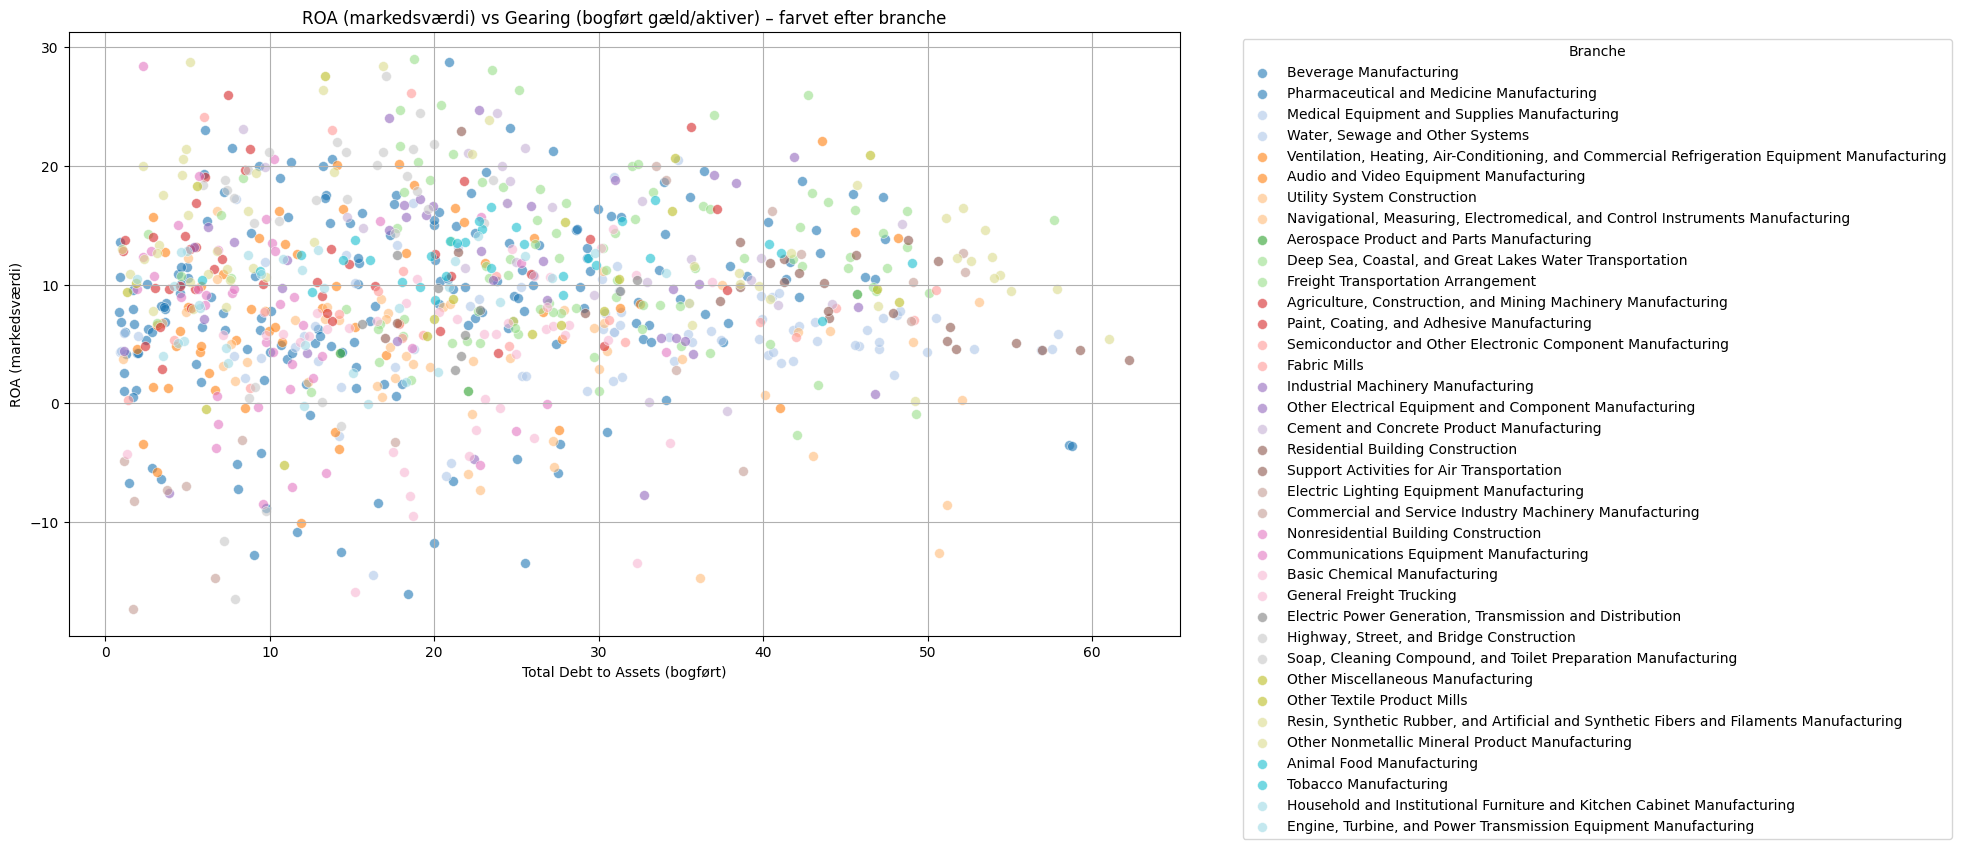

In [786]:
import matplotlib.pyplot as plt
import numpy as np

# 1. copy data_specificity if high_specifity = 1
data_specificity_ROE_market_high = data_specificity[data_specificity['High_specifity'] == 1].copy()

# Set up plot
plt.figure(figsize=(12, 7))

# Unique industry groups
unique_industries = data_specificity_ROE_market_high['NAICS Industry Group Name'].unique()

# Assign a color from colormap to each industry
colormap = plt.get_cmap('tab20')
num_colors = len(unique_industries)
colors = colormap(np.linspace(0, 1, num_colors))

# Loop through each industry and plot separately
for idx, industry in enumerate(unique_industries):
    subset = data_specificity_ROE_market_high[data_specificity_ROE_market_high['NAICS Industry Group Name'] == industry]
    plt.scatter(
        subset['debt_book_value'],
        subset['ROA_market_value'],
        color=colors[idx],
        alpha=0.6,
        edgecolors='w',
        linewidths=0.5,
        s=50,
        label=industry
    )

plt.title('ROA (markedsværdi) vs Gearing (bogført gæld/aktiver) – farvet efter branche')
plt.xlabel('Total Debt to Assets (bogført)')
plt.ylabel('ROA (markedsværdi)')
plt.grid(True)
plt.tight_layout()

# Optional: limit legend if too many
if num_colors <= 50:
    plt.legend(title='Branche', bbox_to_anchor=(1.05, 1), loc='upper left')
else:
    print("⚠️ For mange brancher til at vise en overskuelig legende (vises ikke automatisk).")

plt.show()


her laver vi ROE på High

In [767]:
# 1. copy data_specificity if high_specifity = 1
data_specificity_ROE_market_high = data_specificity[data_specificity['High_specifity'] == 1].copy()


# 2. Add fixed effect variables
data_specificity_ROE_market_high['year'] = data_specificity_ROE_market_high['year'].astype(str)
data_specificity_ROE_market_high['branche'] = data_merge['NAICS Sector Name'].astype(str)

# 3. Define all variables used in the model (including fixed effects)
model_vars_data_specificity_ROE_market = [
    'ROE_market_value',
    'debt_market_value',
    'Debt_squared',
    'Effective Tax Rate, (%)',
    'EBITDA Margin, Percent',
    'Total Cash Dividends Paid, Cumulative',
    'Growth',
    'risk',
    'year',
    'branche'
]

# 4. Remove missing/infinite values in any variable used
data_specificity_ROE_market_high = data_specificity_ROE_market_high[model_vars_data_specificity_ROE_market].replace([np.inf, -np.inf], np.nan).dropna()

# 5. Run the regression with both year and industry fixed effects
model_specificity_ROE_market_high = smf.ols(
    formula='Q("ROE_market_value") ~ Q("debt_market_value") + Q("Debt_squared") + risk + '
            'Q("Effective Tax Rate, (%)") + Q("EBITDA Margin, Percent") + '
            'Q("Total Cash Dividends Paid, Cumulative") + Growth + C(year) + C(branche)',
    data=data_specificity_ROE_market_high
).fit(cov_type='HC3')

print(model_specificity_ROE_market_high.summary())

KeyError: 'High_specifity'

In [758]:
data_specificity_ROE_market_high.head()

,ROE_market_value,debt_market_value,Debt_squared,"Effective Tax Rate, (%)","EBITDA Margin, Percent","Total Cash Dividends Paid, Cumulative",Growth,risk,year,branche
149,-6.521663,2.215735,4.909480,0.00000,-12.086646,0,13.034467,2.745517,2024,Manufacturing
150,48.355483,63.515175,4034.177402,39.62926,17.705147,-25321000,43275.658657,0.000000,2000,Manufacturing
152,49.737905,64.960008,4219.802594,52.56330,14.677052,-20249000,0.262500,-0.251923,2002,Manufacturing
153,35.061021,60.590846,3671.250589,59.59596,13.053506,-20000000,-6.956783,-0.608216,2003,Manufacturing
154,18.025784,40.982821,1679.591593,46.53465,14.081359,-20000000,3.182657,0.417959,2004,Manufacturing


In [753]:
turning_point_ROE_high = -model_specificity_ROE_market_high.params['Q("debt_market_value")'] / (2 * model_specificity_ROE_market_high.params['Q("Debt_squared")'])
print(f"Turning point (Debt Ratio where ROE is max/min): {turning_point_ROE_high:.2f}")

Turning point (Debt Ratio where ROE is max/min): 129.91


Her laver vi ROE på medium

In [748]:
# 1. copy data_specificity if high_specifity = 1
data_specificity_ROE_market_medium = data_specificity[data_specificity['medium_specifity'] == 1].copy()


# 2. Add fixed effect variables
data_specificity_ROE_market_medium['year'] = data_specificity_ROE_market_medium['year'].astype(str)
data_specificity_ROE_market_medium['branche'] = data_merge['NAICS Sector Name'].astype(str)

# 3. Define all variables used in the model (including fixed effects)
model_vars_data_specificity_ROE_market_medium = [
    'ROE_market_value',
    'debt_market_value',
    'Debt_squared',
    'Effective Tax Rate, (%)',
    'EBITDA Margin, Percent',
    'Total Cash Dividends Paid, Cumulative',
    'Growth',
    'risk',
    'year',
    'branche'
]

# 4. Remove missing/infinite values in any variable used
data_specificity_ROE_market_medium = data_specificity_ROE_market_medium[model_vars_data_specificity_ROE_market_medium].replace([np.inf, -np.inf], np.nan).dropna()

# 5. Run the regression with both year and industry fixed effects
model_specificity_ROE_market_medium = smf.ols(
    formula='Q("ROE_market_value") ~ Q("debt_market_value") + Q("Debt_squared") + risk + '
            'Q("Effective Tax Rate, (%)") + Q("EBITDA Margin, Percent") + '
            'Q("Total Cash Dividends Paid, Cumulative") + Growth + C(year) + C(branche)',
    data=data_specificity_ROE_market_medium
).fit(cov_type='HC3')

print(model_specificity_ROE_market_medium.summary())

                              OLS Regression Results                             
Dep. Variable:     Q("ROE_market_value")   R-squared:                       0.660
Model:                               OLS   Adj. R-squared:                  0.588
Method:                    Least Squares   F-statistic:                     9.766
Date:                   Thu, 08 May 2025   Prob (F-statistic):           1.30e-23
Time:                           18:10:35   Log-Likelihood:                -621.40
No. Observations:                    189   AIC:                             1311.
Df Residuals:                        155   BIC:                             1421.
Df Model:                             33                                         
Covariance Type:                     HC3                                         
                                                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------

c:\Users\marcu\anaconda3\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 32
  warnings.warn('covariance of constraints does not have full '


In [749]:
turning_point_ROE_medium = -model_specificity_ROE_market_medium.params['Q("debt_market_value")'] / (2 * model_specificity_ROE_market_medium.params['Q("Debt_squared")'])
print(f"Turning point (Debt Ratio where ROE is max/min): {turning_point_ROE_medium:.2f}")

Turning point (Debt Ratio where ROE is max/min): -2.43


Her på ROE og Low

In [750]:
# 1. copy data_specificity if high_specifity = 1
data_specificity_ROE_market_low = data_specificity[data_specificity['low_specifity'] == 1].copy()


# 2. Add fixed effect variables
data_specificity_ROE_market_low['year'] = data_specificity_ROE_market_low['year'].astype(str)
data_specificity_ROE_market_low['branche'] = data_merge['NAICS Sector Name'].astype(str)

# 3. Define all variables used in the model (including fixed effects)
model_vars_data_specificity_ROE_market_low = [
    'ROE_market_value',
    'debt_market_value',
    'Debt_squared',
    'Effective Tax Rate, (%)',
    'EBITDA Margin, Percent',
    'Total Cash Dividends Paid, Cumulative',
    'Growth',
    'risk',
    'year',
    'branche'
]

# 4. Remove missing/infinite values in any variable used
data_specificity_ROE_market_low = data_specificity_ROE_market_low[model_vars_data_specificity_ROE_market_low].replace([np.inf, -np.inf], np.nan).dropna()

# 5. Run the regression with both year and industry fixed effects
model_specificity_ROE_market_low = smf.ols(
    formula='Q("ROE_market_value") ~ Q("debt_market_value") + Q("Debt_squared") + risk + '
            'Q("Effective Tax Rate, (%)") + Q("EBITDA Margin, Percent") + '
            'Q("Total Cash Dividends Paid, Cumulative") + Growth + C(year) + C(branche)',
    data=data_specificity_ROE_market_low
).fit(cov_type='HC3')

print(model_specificity_ROE_market_low.summary())

                              OLS Regression Results                             
Dep. Variable:     Q("ROE_market_value")   R-squared:                       0.321
Model:                               OLS   Adj. R-squared:                  0.236
Method:                    Least Squares   F-statistic:                     3.668
Date:                   Thu, 08 May 2025   Prob (F-statistic):           9.05e-10
Time:                           18:10:49   Log-Likelihood:                -1168.0
No. Observations:                    318   AIC:                             2408.
Df Residuals:                        282   BIC:                             2543.
Df Model:                             35                                         
Covariance Type:                     HC3                                         
                                                                     coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------

c:\Users\marcu\anaconda3\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 35, but rank is 34
  warnings.warn('covariance of constraints does not have full '


In [742]:
turning_point_ROE_low = -model_specificity_ROE_market_low.params['Q("debt_market_value")'] / (2 * model_specificity_ROE_market_low.params['Q("Debt_squared")'])
print(f"Turning point (Debt Ratio where ROE is max/min): {turning_point_ROE_low:.2f}")

Turning point (Debt Ratio where ROE is max/min): 325.84
